In [157]:
!pip install pmdarima


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
!pip install sktime


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [159]:
!pip install sktime[all_extras]

  Using cached arch-7.0.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached autots-0.6.15-py3-none-any.whl.metadata (10 kB)
  Using cached dash-2.18.1-py3-none-any.whl.metadata (10 kB)
  Using cached dtaidistance-2.3.12-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached dtw_python-1.5.3-cp311-cp311-win_amd64.whl.metadata (48 kB)
  Using cached gluonts-0.15.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached holidays-0.57-py3-none-any.whl.metadata (26 kB)
  Using cached mne-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached optuna-3.6.1-py3-none-any.whl.metadata (17 kB)
  Using cached pycatch22-0.4.5.tar.gz (50 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scikit_optimiz

  error: subprocess-exited-with-error
  
  × Building wheel for pycatch22 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\pycatch22
      copying src\pycatch22\catch22.py -> build\lib.win-amd64-cpython-311\pycatch22
      copying src\pycatch22\__init__.py -> build\lib.win-amd64-cpython-311\pycatch22
      running egg_info
      writing src\pycatch22.egg-info\PKG-INFO
      writing dependency_links to src\pycatch22.egg-info\dependency_links.txt
      writing top-level names to src\pycatch22.egg-info\top_level.txt
      reading manifest file 'src\pycatch22.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
      adding license file 'LICENSE'
      writing manifest file 'src\pycatch22.egg-info\SOURCES.txt'
      running build_ext
      building 'catch22_C' extension
      error: Microsoft Visual C++ 14.0 or greater is r

In [160]:
# *********************************
# Importar las librerías necesarias
# *********************************
import numpy  as np
import pandas as pd
from   sktime.forecasting.model_selection import temporal_train_test_split
from   sktime.forecasting.naive import NaiveForecaster
from   sktime.forecasting.base import ForecastingHorizon
from   sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_squared_error, mean_squared_percentage_error
from   sktime.forecasting.arima import AutoARIMA
from   sktime.forecasting.compose import make_reduction
from   sklearn.metrics import r2_score
from   statsmodels.tsa.seasonal import seasonal_decompose
from   statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import networkx as nx
import os
import joblib
import random
from   libpysal.weights import W
import geopandas as gpd
from   hyperopt import fmin, tpe, hp, Trials
from   hyperopt.pyll.base import scope


### Tablon Load

In [161]:
RANDOM_SEED = 69
path_tablon = '.\\data\\fpc_main_dataset.csv'
df_tablon = pd.read_csv(path_tablon,  dtype = 'unicode')
df_tablon.head()

,periodo,departamento,superficie_km2,poblacion,ingreso_percapita,flag,cant_fallecidos,cant_fallecidos_cancer,cant_fallecidos_m_1,cant_fallecidos_m_2,...,prom_fallecidos_rango_edad_juventud_m_12,prom_fallecidos_rango_edad_juventud_m_18,prom_fallecidos_rango_edad_juventud_m_24,prom_fallecidos_rango_edad_primera_infancia_m_2,prom_fallecidos_rango_edad_primera_infancia_m_3,prom_fallecidos_rango_edad_primera_infancia_m_6,prom_fallecidos_rango_edad_primera_infancia_m_9,prom_fallecidos_rango_edad_primera_infancia_m_12,prom_fallecidos_rango_edad_primera_infancia_m_18,prom_fallecidos_rango_edad_primera_infancia_m_24
0,2021-05-01,HUANCAVELICA,22131.47,428225.0,416.7188784,19,363,59,377,744,...,8.2500000000000018,8.5,8.0833333333333321,7.0,7.0,5.5,6.2222222222222223,7.5,7.2222222222222223,7.58333333333333
1,2022-03-01,HUANCAVELICA,22131.47,428225.0,416.7188784,19,201,40,246,424,...,8.8333333333333339,8.61111111111111,8.5833333333333339,7.5,5.666666666666667,6.0,6.333333333333333,6.5833333333333339,6.5000000000000009,6.875
2,2019-05-01,HUANCAVELICA,22131.47,428225.0,416.7188784,19,158,38,147,317,...,8.0833333333333339,7.7777777777777795,7.4583333333333339,6.0,5.666666666666667,6.5,6.2222222222222223,7.0,7.9999999999999991,7.7916666666666679
3,2019-02-01,HUANCAVELICA,22131.47,428225.0,416.7188784,19,170,35,144,296,...,8.1666666666666661,7.6111111111111116,7.708333333333333,7.0,7.3333333333333339,6.5,7.4444444444444438,7.9166666666666661,8.1111111111111125,7.9166666666666687
4,2020-06-01,HUANCAVELICA,22131.47,428225.0,416.7188784,19,196,34,195,357,...,8.6666666666666661,7.8333333333333339,8.2083333333333321,7.5,7.0,6.5,7.8888888888888893,7.9166666666666661,7.4444444444444446,7.375


In [162]:
# drop na
#df_tablon.dropna(inplace=True)
#************************
# drop useless columns
df_tablon.drop(columns = ['flag','cant_fallecidos'], inplace = True)

In [163]:
df_tablon.dtypes

periodo                                             object
departamento                                        object
superficie_km2                                      object
poblacion                                           object
ingreso_percapita                                   object
                                                     ...  
prom_fallecidos_rango_edad_primera_infancia_m_6     object
prom_fallecidos_rango_edad_primera_infancia_m_9     object
prom_fallecidos_rango_edad_primera_infancia_m_12    object
prom_fallecidos_rango_edad_primera_infancia_m_18    object
prom_fallecidos_rango_edad_primera_infancia_m_24    object
Length: 141, dtype: object

In [164]:
df_tablon.isna().sum().sum()


6858

In [165]:
# dtype conversion
# ************************
df_tablon['periodo'] = pd.to_datetime(df_tablon['periodo'], format='mixed')
# Identify columns to convert
columns_to_convert = [col for col in df_tablon.columns if col not in ['periodo', 'departamento']]
# Batch conversion to float
df_tablon[columns_to_convert] = df_tablon[columns_to_convert].astype(float)    
df_tablon['cant_fallecidos_lag_01'] = df_tablon['cant_fallecidos_m_2'] - df_tablon['cant_fallecidos_m_1']
# ************************
df_tablon = df_tablon.sort_values(['periodo', 'departamento'], ascending=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13592\73249093.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tablon['cant_fallecidos_lag_01'] = df_tablon['cant_fallecidos_m_2'] - df_tablon['cant_fallecidos_m_1']


In [166]:
#************************
#Restrict data universe until August 2022
#************************
end_date = '2019-12-31'
first_date='2017-04-01'
df_tablon = df_tablon.query('periodo <= @end_date and periodo>=@first_date')


In [167]:
df_tablon.head(3)

,periodo,departamento,superficie_km2,poblacion,ingreso_percapita,cant_fallecidos_cancer,cant_fallecidos_m_1,cant_fallecidos_m_2,cant_fallecidos_m_3,cant_fallecidos_m_6,...,prom_fallecidos_rango_edad_juventud_m_18,prom_fallecidos_rango_edad_juventud_m_24,prom_fallecidos_rango_edad_primera_infancia_m_2,prom_fallecidos_rango_edad_primera_infancia_m_3,prom_fallecidos_rango_edad_primera_infancia_m_6,prom_fallecidos_rango_edad_primera_infancia_m_9,prom_fallecidos_rango_edad_primera_infancia_m_12,prom_fallecidos_rango_edad_primera_infancia_m_18,prom_fallecidos_rango_edad_primera_infancia_m_24,cant_fallecidos_lag_01
1773,2017-04-01,AMAZONAS,39249.13,379384.0,564.897955,14.0,60.0,116.0,116.0,116.0,...,3.0,3.0,1.5,1.5,1.5,1.5,1.5,1.5,1.5,56.0
1023,2017-04-01,ANCASH,35914.81,1083519.0,476.515369,46.0,298.0,581.0,581.0,581.0,...,17.0,17.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,283.0
2019,2017-04-01,APURIMAC,20895.79,405759.0,349.871019,29.0,111.0,219.0,219.0,219.0,...,7.5,7.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,108.0


In [168]:
df_tablon.groupby('periodo')['departamento'].count().unique()

array([25], dtype=int64)

##### 1. FIRST APPROACH: TIME SERIES FORECAST BY PERIOD ALONE

In [169]:

df_tablon_v = df_tablon.groupby('periodo')['cant_fallecidos_cancer'].sum().reset_index()
df_tablon_v['periodo'] = df_tablon_v['periodo'] + pd.offsets.MonthBegin(1) - pd.Timedelta(days=1)
df_tablon_v.set_index('periodo', inplace = True)
df_tablon_v.tail()

,cant_fallecidos_cancer
periodo,
2019-08-31,2294.0
2019-09-30,2112.0
2019-10-31,2282.0
2019-11-30,2236.0
2019-12-31,2346.0


###### 1.1 CREATING A GENERIC FUNTION TO TEST STATIONALITY

In [170]:
def adfuller_invoke(df_series):
   # Perform ADF test
   adf_result = adfuller(df_series)
   ##############################
   # Prepare data for plotting
   critical_values = adf_result[4]
   adf_statistic   = adf_result[0]
   p_value         = adf_result[1]
   ##############################
   # Interpretation: If p-value < 0.05, the series is stationary
   if adf_result[1] < 0.04:
      sassess= 'The series is stationary'
   else:
      sassess= 'The series is not stationary'
   
   print(f'ADF Statistic: {adf_statistic}')
   print(f'p-value: {p_value}')
   print(sassess)
   #############################
   # Plot graph
   plot_data = pd.DataFrame({
      'Critical Value': list(critical_values.values()),
      'Level': list(critical_values.keys())
   })
   # Add the ADF statistic as a new row
   adf_stat_df = pd.DataFrame({'Critical Value': [adf_statistic], 'Level': ['ADF Statistic']})
   # Concatenate the dataframes
   plot_data = pd.concat([plot_data, adf_stat_df], ignore_index =True)
   # Create the Seaborn bar plot
   plt.figure(figsize=(8, 6))
   sns.barplot(x='Level', y='Critical Value', data =plot_data, palette ='viridis')

   # Add a line for the ADF Statistic
   plt.axhline(adf_statistic, color ='red', linestyle ='--')
   plt.text(3, adf_statistic, 'ADF Statistic', color ='red', va ='center')

   # Annotate the p-value
   plt.text(3, adf_statistic + 0.2, f'p-value: {p_value:.3f}', color='black', va ='center')

   plt.title('ADF Test Results')
   plt.xlabel('Critical Values & ADF Statistic')
   plt.ylabel('Value')
   plt.show()


###### 1.2 TESTING STATIONALITY IN CURRENT DATAFRAME

ADF Statistic: -1.8113151371661063
p-value: 0.3748586885053247
The series is not stationary


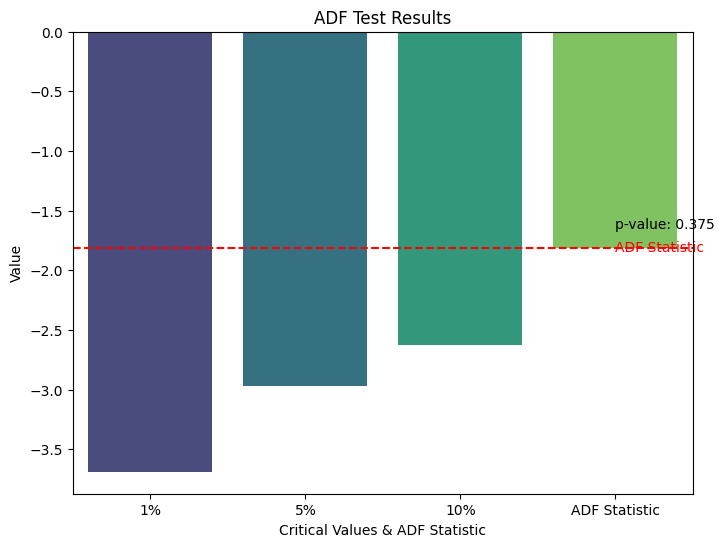

In [171]:
#CRITICAL INPUT PARAMETER
#***************
test_size = 4
#***************
# Stationary test applied to the training set
#***************
adfuller_invoke(df_tablon_v.loc[:df_tablon_v.tail(test_size).index.min(),'cant_fallecidos_cancer'])
#df_tablon_v.loc[:df_tablon_v.tail(test_size+1).index.min(),'cant_fallecidos_cancer']



###### 1.3 TRANSFORMING DATAFRAME TO MAKE IT STATIONARY

ADF Statistic: -8.689951688248167
p-value: 4.0660456797724313e-14
The series is stationary


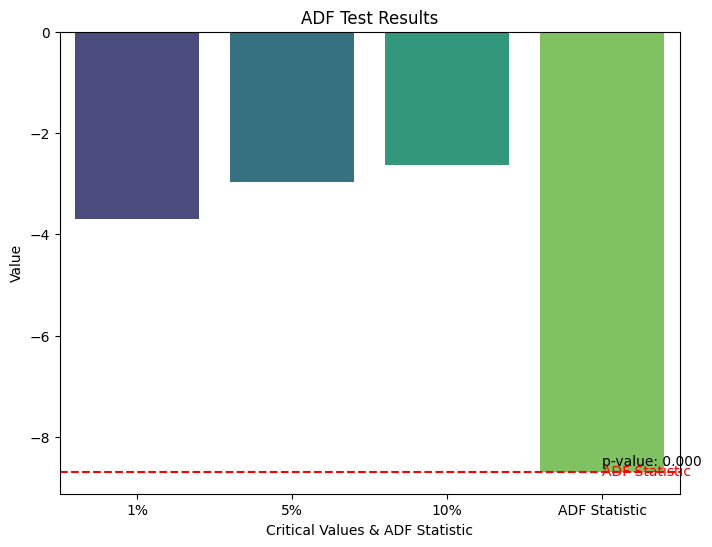

In [172]:
df_tablon_v['diff_cant_fallecidos_cancer'] = df_tablon_v['cant_fallecidos_cancer'].diff()
df_tablon_v.dropna(inplace =True)
adfuller_invoke(df_tablon_v.loc[:df_tablon_v.tail(test_size+1).index.min(),'diff_cant_fallecidos_cancer'])
#df_tablon_v.loc[:df_tablon_v.tail(test_size+1).index.min(),'diff_cant_fallecidos_cancer']

###### 1.4 APPLYING A NAIVE FORECASTER MODEL 


R2 (R2): 96.71%
Mean Square Percentage Error (MSPE): 32.23%


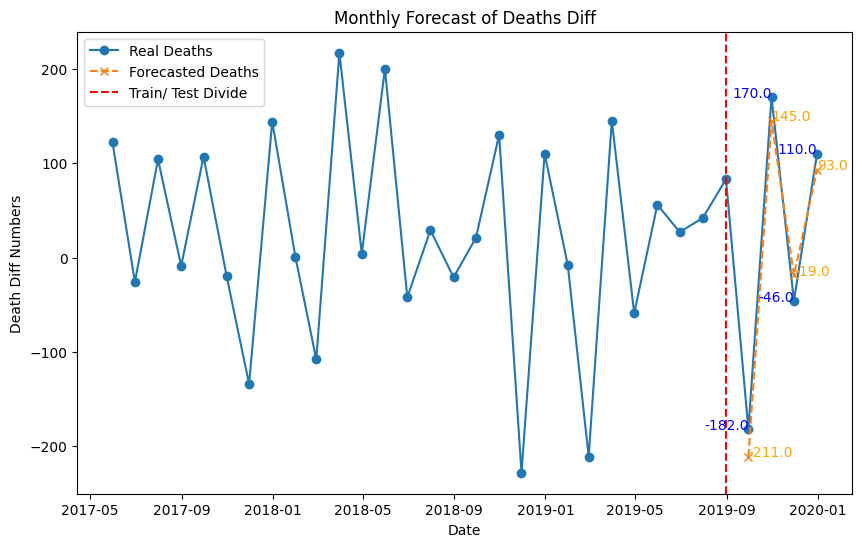

In [173]:
#::::::::::::::::::::::::::::::::::::::::
#KEY PARAMETERS TO CALLIBRATE
# strategy, window_length, sp
#::::::::::::::::::::::::::::::::::::::::
series = df_tablon_v['diff_cant_fallecidos_cancer']

# Split data in training and testing set
y_train, y_test = temporal_train_test_split(series, test_size=test_size)

# Define forecast horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Create and train the model
forecaster = NaiveForecaster(strategy='mean', window_length=12, sp=7)  # Promedio móvil simple
forecaster.fit(y_train)

# Make predictions
y_pred = forecaster.predict(fh)
# **********************
df_resumen = pd.DataFrame({'Modelo':'NaiveForecaster','y_test': y_test, 'y_pred': y_pred}, index = y_test.index)
# **********************
# Generate performance metrics
#****************************
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_percentage_error(y_test, y_pred, square_root=True)
print(f'R2 (R2): {r2:.2%}')
print(f'Mean Square Percentage Error (MSPE): {rmse:.2%}')

# Graph results with forecasted and real values
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Real Deaths', marker='o')
plt.plot(y_test.index, y_pred, label='Forecasted Deaths', linestyle='--', marker='x')
plt.axvline(y_train.index[-1], color='red', linestyle='--', label='Train/ Test Divide')

# Añadir annotations to the series
for i in range(len(y_test)):
    plt.text(y_test.index[i], y_test.iloc[i], f'{y_test.iloc[i]:.1f}', color='blue', ha='right')
    plt.text(y_test.index[i], y_pred.iloc[i], f'{y_pred.iloc[i]:.1f}', color='orange', ha='left')

plt.legend()
plt.title('Monthly Forecast of Deaths Diff')
plt.xlabel('Date')
plt.ylabel('Death Diff Numbers')
plt.show()

###### 1.5 REVERTING PREDICTIONS TO THE ORIGINAL SERIES FORECAST
> ###### ONCE WE HAVE CREATED A FORECAST FOR THE TRANSFORMED SERIES. WE REVERT THE PROCESS TO GET THE FORECAST OF THE ORIGINAL SERIES    

In [174]:
df_stats = pd.merge(df_tablon_v, y_pred, how='left', on='periodo', suffixes=['','_predicted'])
df_stats['diff_cant_fallecidos_cancer_predicted_cumsum'] = df_stats['diff_cant_fallecidos_cancer_predicted'].cumsum(skipna=True)
#************************************************
base_quantity = df_stats.loc[df_stats['diff_cant_fallecidos_cancer_predicted'].isna(),'cant_fallecidos_cancer'].tail(1)[0]
#************************************************
df_stats['cant_fallecidos_cancer_predicted']=df_stats['diff_cant_fallecidos_cancer_predicted_cumsum'] + base_quantity
df_stats = df_stats[['cant_fallecidos_cancer','cant_fallecidos_cancer_predicted']]
display(df_stats.head())

,cant_fallecidos_cancer,cant_fallecidos_cancer_predicted
periodo,,
2017-05-31,1740.0,NaN
2017-06-30,1714.0,NaN
2017-07-31,1818.0,NaN
2017-08-31,1809.0,NaN
2017-09-30,1916.0,NaN


In [175]:
df_stats.tail(13)

,cant_fallecidos_cancer,cant_fallecidos_cancer_predicted
periodo,,
2018-12-31,2219.0,NaN
2019-01-31,2211.0,NaN
2019-02-28,2000.0,NaN
2019-03-31,2145.0,NaN
2019-04-30,2086.0,NaN
2019-05-31,2142.0,NaN
2019-06-30,2169.0,NaN
2019-07-31,2211.0,NaN
2019-08-31,2294.0,NaN


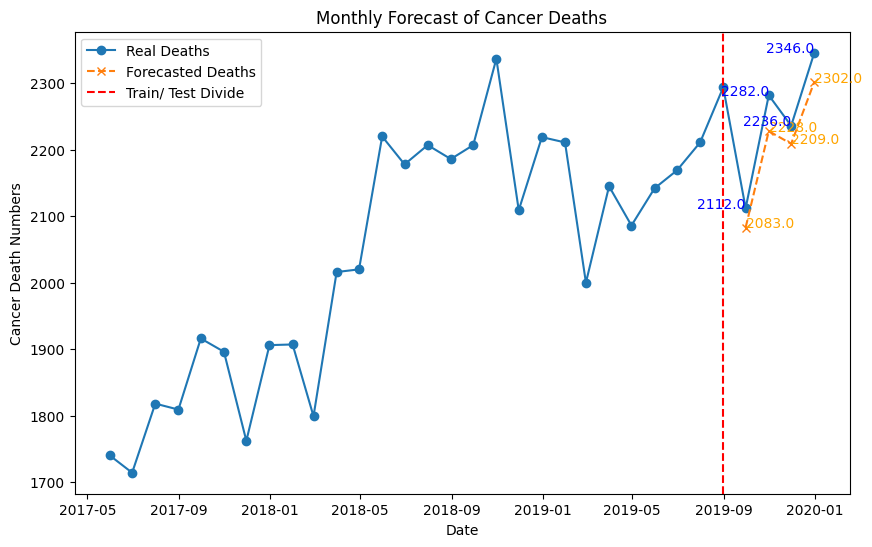

In [176]:
########################
##ORIGINAL SERIES PLOT
########################
series = df_stats['cant_fallecidos_cancer']
series_pred= df_stats.loc[~df_stats['cant_fallecidos_cancer_predicted'].isna(),:]
# Graph real versus predicted values
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Real Deaths', marker='o')
plt.plot(series_pred.index, series_pred.iloc[:,1], label='Forecasted Deaths', linestyle='--', marker='x')
plt.axvline(y_train.index[-1], color='red', linestyle='--', label='Train/ Test Divide')

# Add annotations
for i in range(len(series_pred)):
    plt.text(series_pred.index[i], series_pred.iloc[i,0], f'{series_pred.iloc[i,0]:.1f}', color='blue', ha='right')
    plt.text(series_pred.index[i], series_pred.iloc[i,1], f'{series_pred.iloc[i,1]:.1f}', color='orange', ha='left')

plt.legend()
plt.title('Monthly Forecast of Cancer Deaths')
plt.xlabel('Date')
plt.ylabel('Cancer Death Numbers')
plt.show()

###### 1.6 CHANGING GRANULARITY BY "PERIODO" AND "DEPARTAMENTO"

In [177]:
#PREDICTION BY PERIODO, DEPARTAMENTO
#####################################
# 1) In the training set --> For each {departamento, periodo} features, get the sum of the latest 12 month window
# 2) Compute the total and get a ratio for each combination
# 3) Prorrate forecasted value for each ratio in the same granularity level
####################################
# STEP 1
# TRAINING SET UNIVERSE
df_stats_detailed = df_tablon[['periodo','departamento','cant_fallecidos_cancer']].copy()
df_stats_detailed['periodo'] = df_stats_detailed['periodo'] + pd.offsets.MonthBegin(1) - pd.Timedelta(days=1)
df_stats_detailed.set_index('periodo', inplace=True)
# substract only the training set
df_stats_testing = df_stats_detailed.loc[series_pred.index,:]
df_stats_training= df_stats_detailed.drop(series_pred.index)


In [178]:
# Viual validation for CUMSUM in a single state --e.g AMAZONAS
df_stats_training[df_stats_training['departamento']=='AMAZONAS'].tail(13)

,departamento,cant_fallecidos_cancer
periodo,,
2018-08-31,AMAZONAS,11.0
2018-09-30,AMAZONAS,9.0
2018-10-31,AMAZONAS,17.0
2018-11-30,AMAZONAS,10.0
2018-12-31,AMAZONAS,20.0
2019-01-31,AMAZONAS,19.0
2019-02-28,AMAZONAS,9.0
2019-03-31,AMAZONAS,14.0
2019-04-30,AMAZONAS,13.0


In [179]:
#STEP 2
# RATIO BASED ON THE LATEST PERIOD IN THE TRAINING SET
df_split = df_stats_training.groupby('departamento')['cant_fallecidos_cancer'].\
            rolling(window=12, min_periods=1).sum().reset_index(level=0)
df_split.rename(columns={'cant_fallecidos_cancer':'cum_sum_12'},inplace=True)
df_split = df_split.loc[df_split.index.max(), :]
df_split['ratio'] = df_split['cum_sum_12'] / df_split['cum_sum_12'].sum()
df_split=df_split[['departamento','ratio']]
df_split.head(2)

,departamento,ratio
periodo,,
2019-08-31,AMAZONAS,0.007080
2019-08-31,ANCASH,0.046613


In [180]:
df_stats_testing

,departamento,cant_fallecidos_cancer
periodo,,
2019-09-30,AMAZONAS,19.0
2019-09-30,ANCASH,100.0
2019-09-30,APURIMAC,18.0
2019-09-30,AREQUIPA,134.0
2019-09-30,AYACUCHO,36.0
...,...,...
2019-12-31,PUNO,79.0
2019-12-31,SAN MARTIN,59.0
2019-12-31,TACNA,23.0


In [181]:
#3 PRO RATE BASED ON df_split
##############################
#df_stats_testing.head(2)
#series_pred['cant_fallecidos_cancer_predicted']
#df_stats_testing
# Adding ratio to the series
df_stats_testing= pd.merge(df_stats_testing, df_split, how='left', on='departamento').set_index(df_stats_testing.index)
df_stats_testing

,departamento,cant_fallecidos_cancer,ratio
periodo,,,
2019-09-30,AMAZONAS,19.0,0.007080
2019-09-30,ANCASH,100.0,0.046613
2019-09-30,APURIMAC,18.0,0.013471
2019-09-30,AREQUIPA,134.0,0.057635
2019-09-30,AYACUCHO,36.0,0.018867
...,...,...,...
2019-12-31,PUNO,79.0,0.033869
2019-12-31,SAN MARTIN,59.0,0.022694
2019-12-31,TACNA,23.0,0.014849


In [182]:
#series_pred
df_stats_testing = pd.merge(df_stats_testing,series_pred['cant_fallecidos_cancer_predicted'], how='left', on='periodo')
df_stats_testing['cant_fallecidos_cancer_predicted']=(df_stats_testing['cant_fallecidos_cancer_predicted']*df_stats_testing['ratio']).round()


In [183]:
df_stats_testing.drop(columns=['ratio'], inplace=True)
#df_stats_testing['var']=np.abs((df_stats_testing['cant_fallecidos_cancer_predicted'] - df_stats_testing['cant_fallecidos_cancer'])/df_stats_testing['cant_fallecidos_cancer'])
#df_stats_testing

In [184]:
def generate_performance_list(df):
    # Initialize an empty DataFrame to store results
    df_output = pd.DataFrame(columns=['departamento', 'avg_fallecidos_cancer', 'rmse_fallecidos_cancer'])
    
    state_list = df['departamento'].unique()
    
    for e in state_list:
        rmse= mean_squared_error(df[df['departamento'] == e]['cant_fallecidos_cancer'], 
                      df[df['departamento'] == e]['cant_fallecidos_cancer_predicted'], squared= False)
        
        avg = df[df['departamento'] == e]['cant_fallecidos_cancer'].mean()
        
        # Create a DataFrame for the current result
        df_result = pd.DataFrame({'departamento': [e], 'avg_fallecidos_cancer': [avg], 'rmse_fallecidos_cancer': [rmse]})
        
        # Append to the output DataFrame
        df_output = pd.concat([df_output, df_result], ignore_index=True) 
    df_output['relative_error'] = df_output['rmse_fallecidos_cancer']/df_output['avg_fallecidos_cancer']
    return df_output.sort_values('relative_error')


###### 1.7 PERFORMANCE EVALUATION

In [185]:
generate_performance_list(df_stats_testing).reset_index(drop=True)

,departamento,avg_fallecidos_cancer,rmse_fallecidos_cancer,relative_error
0,ANCASH,103.50,11.75,0.113527
1,HUANCAVELICA,35.00,11.25,0.321429
2,CUSCO,115.75,45.75,0.395248
3,TUMBES,17.00,7.50,0.441176
4,AYACUCHO,44.00,21.00,0.477273
5,AMAZONAS,16.75,8.50,0.507463
6,CALLAO,94.25,54.25,0.575597
7,LORETO,29.50,21.75,0.737288
8,MOQUEGUA,19.00,17.00,0.894737
9,LA LIBERTAD,171.50,154.50,0.900875


###### 1.8 INSIGHTS
> ###### CURRENT MODEL HAS ITS OPTIMAL PERFORMANCE WHILE PREDICTING 4 DATA POINTS AND CONSIDERING ONLY THE "PERIODO" GRANULARITY. HOWEVER; THE MODEL POORLY PERFORMS ON MOST OF THE CASES WHILST GENERATING PREDICTIONS BY "PERIODO", "DEPARTAMENTO". 
> ###### THUS, WE MUST EXPORE THE POSSIBILITY TO DO AN INDIVIDUAL TIME SERIES MODEL BY "PERIODO", "DEPARTAMENTO" AND VERIFY WHETHER THE MODEL IMPROVE ITS PERFORMANCE IN THE NEW GRANULARITY - BY "PERIODO", "DEPARTAMENTO" 

##### 2. SECOND APPROACH: TIME SERIES FORECAST BY "PERIODO", "DEPARTAMENTO"

In [186]:
def adfuller_evaluate_transform(df,test_size=4,tot_count=0):
    df_output = pd.DataFrame(columns=['periodo','departamento', 'cant_fallecidos_cancer', 'number_transf'])
    # #####################################
    #Generate only testing set for ADF eva
    # #####################################
    df_test=df.drop(df.index.unique()[-test_size:])
    # #####################################
    state_list = df['departamento'].unique()    
    # Loop over each 'departamento'
    for e in state_list:
        # Extract the subset of the dataframe for the current 'departamento'
        df_subset = df_test[df_test['departamento'] == e]
        # Perform ADF test only in testing set
        adf_result = adfuller(df_subset.iloc[:, 1])
        p_value = adf_result[1]
        
        # If p-value is greater than 0.05, perform differencing and call the function recursively
        if p_value >= 0.03:
            tot_count += 1  # Increment transformation count
            # Perform differencing in the whole dataset
            df_temp = df[df['departamento']==e].iloc[:, 1].diff().dropna().to_frame()
            df_temp['departamento'] = e
            df_temp = df_temp.iloc[:, [1, 0]]
            
            # Call the function recursively without returning immediately
            df_transf = adfuller_evaluate_transform(df_temp, test_size, tot_count)            
            df_output = pd.concat([df_output, df_transf.reset_index()], ignore_index=True)
        else:

            # :::::::::::::::::::::::::::::::::::::::::
            df_temp = df[df['departamento']==e].iloc[:, 1].to_frame()
            df_temp['departamento'] = e
            df_temp = df_temp.iloc[:, [1, 0]]
            df_temp['number_transf']= tot_count            
            # :::::::::::::::::::::::::::::::::::::::::
            # Create a DataFrame for the detailed result
            df_output = pd.concat([df_output, df_temp.reset_index()], ignore_index=True)            
        tot_count=0    

    return df_output.set_index('periodo')


THE NEW DATAFRAME CONTAINS TRANSFORMED VALUES - IF APPLICABLE - BASED ON ADF CRITERION

In [187]:
#Testing Result of transformed dataframe for a random department --AREQUIPA
adfuller_evaluate_transform(df_stats_detailed, test_size).query('departamento=="UCAYALI"')

,departamento,cant_fallecidos_cancer,number_transf
periodo,,,
2017-05-31,UCAYALI,1.0,1
2017-06-30,UCAYALI,2.0,1
2017-07-31,UCAYALI,5.0,1
2017-08-31,UCAYALI,-1.0,1
2017-09-30,UCAYALI,-7.0,1
2017-10-31,UCAYALI,7.0,1
2017-11-30,UCAYALI,2.0,1
2017-12-31,UCAYALI,-1.0,1
2018-01-31,UCAYALI,-4.0,1


In [188]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#How many diff transformations were created per each department?
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#we evaluate in df_stats_detailed training test
#display(df_stats_detailed.index.unique())

df_master = adfuller_evaluate_transform(df_stats_detailed, test_size)
df_summary = df_master.\
                drop(columns=['cant_fallecidos_cancer']).\
                    drop_duplicates(subset=['departamento','number_transf']).\
                        reset_index(drop=True)

df_summary

,departamento,number_transf
0,AMAZONAS,0
1,ANCASH,0
2,APURIMAC,0
3,AREQUIPA,1
4,AYACUCHO,1
5,CAJAMARCA,1
6,CALLAO,0
7,CUSCO,1
8,HUANCAVELICA,1
9,HUANUCO,0


In [189]:
print(f'''Number of departments with transformed values: {df_summary.query("number_transf>0").shape[0]} \n\
Number of departments without transformation:  {df_summary.query("number_transf==0").shape[0]}''')


Number of departments with transformed values: 13 
Number of departments without transformation:  12


###### 2.1 HYPER PARAMETER TUNING: MANUAL APPROACH EXAMPLE

In [190]:
#SAMPLE OPTIMIZATION
DPT ='LAMBAYEQUE'
df_temp = df_master.query('departamento==@DPT').iloc[:,[-2]]
df_temp.head(2)

,cant_fallecidos_cancer
periodo,
2017-05-31,13.0
2017-06-30,3.0


R2 (R2): -1.20%
RMSE: 106.95989229024943


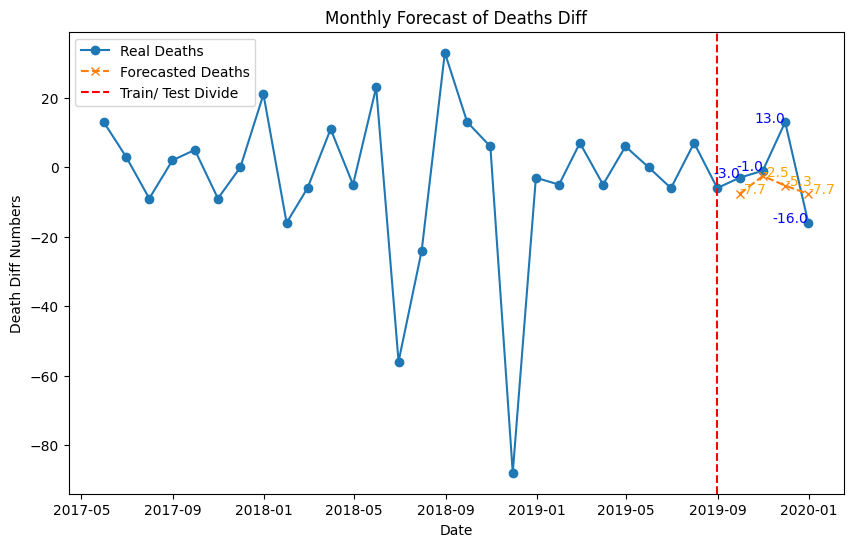

In [191]:
#::::::::::::::::::::::::::::::::::::::::
#KEY PARAMETERS TO CALLIBRATE
# strategy={“last”, “mean”, “drift”}, window_length= [1,2,3,4,5,6,7,8,9,10,11,12..24], sp=[1,..12]
#::::::::::::::::::::::::::::::::::::::::
series = df_temp.iloc[:,0]

# Split data in training and testing set
y_train, y_test = temporal_train_test_split(series, test_size=test_size)

# Define forecast horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Create and train the model
forecaster = NaiveForecaster(strategy='mean', window_length=19, sp=3)  # Promedio móvil simple
forecaster.fit(y_train)

# Make predictions
y_pred = forecaster.predict(fh)
# **********************
df_resumen = pd.DataFrame({'Modelo':'NaiveForecaster','y_test': y_test, 'y_pred': y_pred}, index = y_test.index)
# **********************
# Generate performance metrics
#****************************
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 (R2): {r2:.2%}')
print(f'RMSE: {(rmse)}')
# Graph results with forecasted and real values
plt.figure(figsize=(10, 6))
plt.plot(series.index, series, label='Real Deaths', marker='o')
plt.plot(y_test.index, y_pred, label='Forecasted Deaths', linestyle='--', marker='x')
plt.axvline(y_train.index[-1], color='red', linestyle='--', label='Train/ Test Divide')

# Añadir annotations to the series
for i in range(len(y_test)):
    plt.text(y_test.index[i], y_test.iloc[i], f'{y_test.iloc[i]:.1f}', color='blue', ha='right')
    plt.text(y_test.index[i], y_pred.iloc[i], f'{y_pred.iloc[i]:.1f}', color='orange', ha='left')

plt.legend()
plt.title('Monthly Forecast of Deaths Diff')
plt.xlabel('Date')
plt.ylabel('Death Diff Numbers')
plt.show()

###### 2.2 HYPER PARAMETER TUNNING: BAYESIAN APPROACH EXAMPLE

  1%|          | 11/1000 [00:00<00:19, 51.11trial/s, best loss: -0.3826138379657008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  2%|▏         | 22/1000 [00:00<00:26, 36.69trial/s, best loss: -0.5907746895328208]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 56/1000 [00:01<00:30, 31.43trial/s, best loss: -0.5907746895328208]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▋         | 64/1000 [00:01<00:27, 33.82trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 78/1000 [00:02<00:34, 26.47trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▊         | 87/1000 [00:02<00:38, 23.47trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 103/1000 [00:03<00:27, 33.11trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 111/1000 [00:03<00:33, 26.66trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 122/1000 [00:04<00:28, 30.59trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 135/1000 [00:05<00:52, 16.58trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▍        | 146/1000 [00:05<00:35, 23.93trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 180/1000 [00:06<00:23, 35.19trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 189/1000 [00:06<00:23, 34.35trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 210/1000 [00:07<00:30, 26.06trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 221/1000 [00:08<00:25, 30.21trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 240/1000 [00:08<00:21, 35.63trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 256/1000 [00:09<00:21, 34.28trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 260/1000 [00:09<00:22, 32.31trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 288/1000 [00:10<00:23, 30.42trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 296/1000 [00:10<00:26, 26.59trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 304/1000 [00:10<00:23, 29.54trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 316/1000 [00:11<00:21, 32.06trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 333/1000 [00:12<00:26, 25.44trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 350/1000 [00:12<00:26, 24.16trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 359/1000 [00:13<00:28, 22.14trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 367/1000 [00:13<00:31, 20.14trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▊      | 386/1000 [00:14<00:22, 27.35trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 399/1000 [00:14<00:23, 25.72trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 456/1000 [00:16<00:17, 30.24trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▋     | 465/1000 [00:17<00:14, 35.90trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 473/1000 [00:17<00:17, 30.44trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 481/1000 [00:17<00:17, 30.07trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 488/1000 [00:18<00:19, 26.73trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 506/1000 [00:18<00:23, 21.20trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 520/1000 [00:19<00:16, 28.91trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 524/1000 [00:19<00:16, 29.75trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▎    | 537/1000 [00:19<00:15, 30.81trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 546/1000 [00:20<00:13, 33.18trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 554/1000 [00:20<00:13, 32.80trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 562/1000 [00:20<00:14, 30.38trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 570/1000 [00:21<00:14, 29.90trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 623/1000 [00:23<00:13, 28.44trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 634/1000 [00:23<00:12, 30.24trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 656/1000 [00:24<00:10, 32.85trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 662/1000 [00:24<00:08, 38.68trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 672/1000 [00:24<00:09, 34.63trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 684/1000 [00:25<00:11, 26.53trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 695/1000 [00:25<00:11, 26.85trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 706/1000 [00:26<00:10, 28.85trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████▏  | 713/1000 [00:26<00:09, 30.69trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 726/1000 [00:26<00:07, 34.92trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 734/1000 [00:26<00:07, 34.45trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 742/1000 [00:27<00:08, 31.09trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 753/1000 [00:27<00:08, 28.01trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 776/1000 [00:28<00:08, 26.17trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 785/1000 [00:28<00:08, 26.48trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▎ | 835/1000 [00:31<00:06, 26.64trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▍ | 846/1000 [00:31<00:05, 28.09trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 878/1000 [00:32<00:05, 24.01trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 889/1000 [00:33<00:03, 28.15trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████▏| 913/1000 [00:34<00:03, 25.94trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 935/1000 [00:34<00:02, 28.61trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 944/1000 [00:35<00:02, 24.35trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 959/1000 [00:35<00:01, 24.48trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 981/1000 [00:36<00:00, 21.01trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:37<00:00, 26.40trial/s, best loss: -0.5978710821998817]
Best Parameters: {'sp': 3, 'strategy': 0, 'window_length': 21}
R2 (R2): 59.79%
RMSE: 42.5


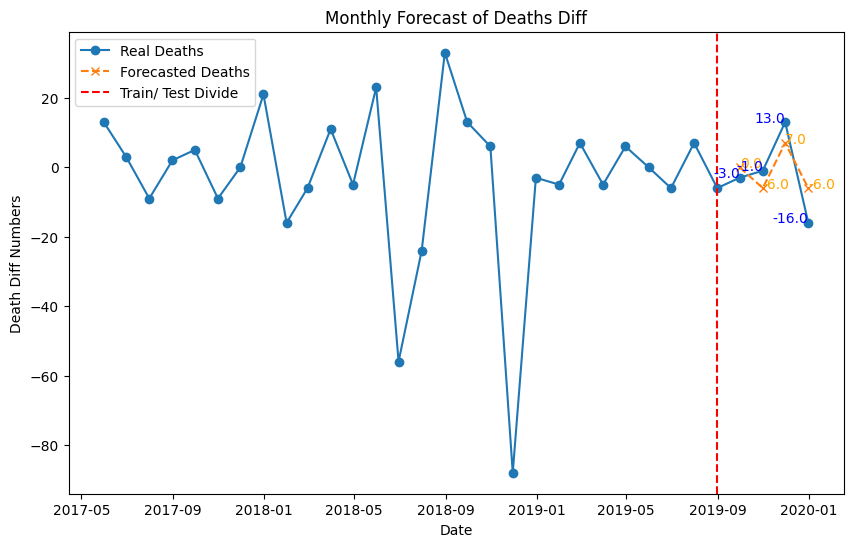

In [192]:
# Define your series and split it into training and testing sets
global_index=df_temp.index                          #save overall index
series = df_temp.iloc[:, 0].reset_index(drop=True)  # Replace df_temp with your actual dataframe
y_train, y_test = temporal_train_test_split(series, test_size=test_size)
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Define the search space for Hyperopt
search_space = {
    'strategy': hp.choice('strategy', ['last', 'mean', 'drift']),
    'window_length': hp.choice('window_length', np.arange(1, 25, dtype=int)),
    'sp': hp.choice('sp', np.arange(1, 13, dtype=int))
}

# Define the objective function
def objective(params):
    # Check if the restriction is violated
    if params['window_length'] <= params['sp']:
        return 1e6  # Large value to penalize invalid parameter combinations
    
    # Create the model with the current set of hyperparameters
    forecaster = NaiveForecaster(strategy=params['strategy'], window_length=params['window_length'], sp=params['sp'])
    
    # Fit the model to the training data
    forecaster.fit(y_train)
    
    # Make predictions
    y_pred = forecaster.predict(fh)
    
    # Calculate the R² score (we minimize the negative R² score)
    r2 = r2_score(y_test, y_pred)
    
    return -r2  # Since we want to maximize R², we minimize the negative value
#*******************************
np.random.seed(RANDOM_SEED)  # For NumPy-based randomness
random.seed(RANDOM_SEED)     # For Python's random module
#*******************************
# Run the Hyperopt optimization
trials = Trials()  # Store details of the optimization process
best_params = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=1000, trials=trials)

# Print the best parameters found
print("Best Parameters:", best_params)

# Convert Hyperopt output into usable strategy, window_length, and sp
best_strategy = ['last', 'mean', 'drift'][best_params['strategy']]
best_window_length = np.arange(1, 25)[best_params['window_length']]
best_sp = np.arange(1, 13)[best_params['sp']]

# Create and train the best model using the found parameters
forecaster = NaiveForecaster(strategy=best_strategy, window_length=best_window_length, sp=best_sp)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)


# ***************************
# Generate performance metrics
#****************************
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2 (R2): {r2:.2%}')
print(f'RMSE: {(rmse)}')
#**********************************************
# Graph results with forecasted and real values
#**********************************************
train_index= global_index[:-test_size]
test_index= global_index[-test_size:]
plt.figure(figsize=(10, 6))
plt.plot(global_index, series, label='Real Deaths', marker='o')
plt.plot(test_index, y_pred, label='Forecasted Deaths', linestyle='--', marker='x')
plt.axvline(train_index[-1], color='red', linestyle='--', label='Train/ Test Divide')

# Añadir annotations to the series
for i in range(len(y_test)):
    plt.text(test_index[i], y_test.iloc[i], f'{y_test.iloc[i]:.1f}', color='blue', ha='right')
    plt.text(test_index[i], y_pred.iloc[i], f'{y_pred.iloc[i]:.1f}', color='orange', ha='left')

plt.legend()
plt.title('Monthly Forecast of Deaths Diff')
plt.xlabel('Date')
plt.ylabel('Death Diff Numbers')
plt.show()


###### 2.3 MODEL CREATION FOR ALL DEPARTMENTS: BATCH PROCESS
> ###### WE WILL USE 2.2 LOGIC AND GENERALIZE IT FOR ALL 25 DEPARTMENTS, SAVE THE MODELS, AND LIST FOR EACH MODEL THE RSME AND ITS OPTIMAL HYPERPARAMETERS BASED ON A BAYESIAN APPROACH

In [193]:
#Creating a file location for the models

# Ensure the "model" folder exists
model_folder = 'model'
os.makedirs(model_folder, exist_ok=True)


In [194]:
df_master.head(2)

,departamento,cant_fallecidos_cancer,number_transf
periodo,,,
2017-04-30,AMAZONAS,14.0,0
2017-05-31,AMAZONAS,25.0,0


In [195]:
def bys_model_optimizer(df_temp):
    # Define your series and split it into training and testing sets

    global_index = df_temp.index                        # Save overall index
    s_department = df_temp['departamento'].unique()[0]  # Save global department
    series = df_temp.iloc[:, 1].reset_index(drop=True)  # Replace df_temp with your actual dataframe
    y_train, y_test = temporal_train_test_split(series, test_size=test_size)
    fh = ForecastingHorizon(y_test.index, is_relative=False)

    # Define the search space for Hyperopt
    search_space = {
        'strategy': hp.choice('strategy', ['last', 'mean', 'drift']),
        'window_length': hp.choice('window_length', np.arange(1, 25, dtype=int)),
        'sp': hp.choice('sp', np.arange(1, 13, dtype=int))
    }

    #******************************
    # Define the objective function
    #******************************
    def objective(params):
        # Check if the restriction is violated
        if params['window_length'] <= params['sp']:
            return 1e6  # Large value to penalize invalid parameter combinations
        
        # Create the model with the current set of hyperparameters
        forecaster = NaiveForecaster(strategy=params['strategy'], window_length=params['window_length'], sp=params['sp'])
        
        # Fit the model to the training data
        forecaster.fit(y_train)
        
        # Make predictions
        y_pred = forecaster.predict(fh)
        
        # Calculate the R² score (we minimize the negative R² score)
        r2 = r2_score(y_test, y_pred)
        
        return -r2  # Since we want to maximize R², we minimize the negative value
    
    #*******************************
    # Run the Hyperopt optimization
    #*******************************
    np.random.seed(RANDOM_SEED)  # For NumPy-based randomness
    random.seed(RANDOM_SEED)     # For Python's random module
    #*******************************
    trials = Trials()  # Store details of the optimization process
    # Loop to ensure at least 65%
    best_result = None
    rerun=True
    attempt_count=0
    while rerun and attempt_count < 6:
        best_params = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=1000, trials=trials, rstate= np.random.seed(RANDOM_SEED))
        best_loss   = trials.best_trial['result']['loss']
        if best_loss<=-0.6:
            rerun = False
            best_result = best_params
        else:
            
            print(f'Unacceptable r² score encountered in attempt {attempt_count}. Rerunning optimization...')
        attempt_count+=1

    if attempt_count==6:
        print(f"Maximum attempts ({attempt_count}) reached. Using the best available model parameters.")
        best_result = best_params

    # Print the best parameters found
    print("Best Parameters:", best_result)

    # Convert Hyperopt output into usable strategy, window_length, and sp
    best_strategy = ['last', 'mean', 'drift'][best_result['strategy']]
    best_window_length = np.arange(1, 25)[best_result['window_length']]
    best_sp = np.arange(1, 13)[best_result['sp']]

    # Create and train the best model using the found parameters
    forecaster = NaiveForecaster(strategy=best_strategy, window_length=best_window_length, sp=best_sp)
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    #***************************
    # Save the model
    #***************************
    # Define the model name and path
    model_path = os.path.join(model_folder, 'naive_forecaster_model_'+s_department+'.pkl')
    # Save the trained model
    joblib.dump(forecaster, model_path)
    print(f"Model saved to {model_path}")    
    # ***************************
    # Generate performance metrics
    #****************************
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f'R2 (R2): {r2:.2%}')
    print(f'RMSE: {(rmse)}')
    df_metrics = pd.DataFrame({'Model': ['NaiveForecaster'], 'Department':[s_department],'R² Score': [r2], 'RMSE': [rmse]})
    return df_metrics

In [196]:
#Testing function for a single department
bys_model_optimizer(df_master.query('departamento=="UCAYALI"'))

  2%|▏         | 19/1000 [00:00<00:20, 48.44trial/s, best loss: -0.2320441988950276]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▎         | 35/1000 [00:00<00:22, 42.77trial/s, best loss: -0.3591160220994475]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 55/1000 [00:01<00:18, 51.39trial/s, best loss: -0.3591160220994475]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 67/1000 [00:01<00:19, 47.57trial/s, best loss: -0.3591160220994475]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 84/1000 [00:01<00:18, 48.50trial/s, best loss: -0.3591160220994475]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 111/1000 [00:02<00:21, 42.06trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 129/1000 [00:02<00:19, 45.79trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▌        | 154/1000 [00:03<00:12, 65.24trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 171/1000 [00:03<00:12, 66.87trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▊        | 186/1000 [00:03<00:12, 67.78trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 217/1000 [00:04<00:11, 66.98trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 231/1000 [00:04<00:13, 58.87trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 244/1000 [00:04<00:13, 56.58trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 259/1000 [00:04<00:12, 58.56trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 291/1000 [00:05<00:11, 59.77trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███       | 311/1000 [00:05<00:11, 58.97trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 330/1000 [00:06<00:11, 56.34trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▍      | 349/1000 [00:06<00:11, 58.35trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 361/1000 [00:06<00:13, 46.91trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▊      | 386/1000 [00:07<00:13, 45.50trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 442/1000 [00:08<00:11, 50.35trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▌     | 454/1000 [00:08<00:10, 53.45trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 466/1000 [00:08<00:12, 42.97trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 484/1000 [00:09<00:10, 48.88trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 501/1000 [00:09<00:10, 47.11trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 518/1000 [00:10<00:10, 43.85trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 531/1000 [00:10<00:09, 47.16trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 549/1000 [00:10<00:09, 48.82trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▋    | 563/1000 [00:10<00:07, 56.41trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 581/1000 [00:11<00:07, 53.25trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 628/1000 [00:12<00:08, 45.09trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 656/1000 [00:12<00:07, 45.44trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 676/1000 [00:13<00:06, 48.77trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▊   | 687/1000 [00:13<00:06, 48.56trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|███████   | 705/1000 [00:13<00:05, 49.67trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 745/1000 [00:14<00:05, 49.81trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▋  | 765/1000 [00:15<00:06, 35.33trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 775/1000 [00:15<00:05, 38.90trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▊  | 786/1000 [00:15<00:05, 42.05trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 856/1000 [00:17<00:04, 35.34trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 875/1000 [00:18<00:03, 41.19trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 890/1000 [00:18<00:02, 41.59trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|█████████ | 905/1000 [00:18<00:02, 42.43trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 926/1000 [00:19<00:01, 43.52trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 959/1000 [00:20<00:01, 38.53trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 980/1000 [00:20<00:00, 39.59trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 989/1000 [00:21<00:00, 37.03trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:21<00:00, 46.87trial/s, best loss: -0.5069060773480663]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 6, 'strategy': 1, 'window_length': 11}
Model saved to model\naive_foreca

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



,Model,Department,R² Score,RMSE
0,NaiveForecaster,UCAYALI,0.506906,22.3125


In [197]:
df_output = pd.DataFrame(columns=['Model','Department', 'R² Score', 'RMSE'])
for e in df_master['departamento'].unique():
    df_result = bys_model_optimizer(df_master[df_master['departamento']==e])
    df_output = pd.concat([df_output, df_result], ignore_index=True)

  2%|▏         | 22/1000 [00:00<00:18, 52.61trial/s, best loss: 0.22101010101010088]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▌         | 50/1000 [00:00<00:19, 48.98trial/s, best loss: -0.1874298540965209]  

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 62/1000 [00:01<00:18, 50.31trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 92/1000 [00:01<00:15, 58.43trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 101/1000 [00:01<00:13, 64.61trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 115/1000 [00:02<00:14, 61.95trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 144/1000 [00:02<00:15, 56.22trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 167/1000 [00:02<00:12, 64.72trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 189/1000 [00:03<00:12, 67.16trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 203/1000 [00:03<00:13, 59.75trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 218/1000 [00:03<00:13, 57.47trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 230/1000 [00:04<00:15, 50.19trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 250/1000 [00:04<00:12, 58.04trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▋       | 263/1000 [00:04<00:13, 56.65trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 299/1000 [00:05<00:10, 64.13trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███       | 312/1000 [00:05<00:12, 56.16trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 340/1000 [00:05<00:11, 58.36trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 361/1000 [00:06<00:11, 56.62trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 382/1000 [00:06<00:10, 58.36trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 396/1000 [00:06<00:09, 61.23trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 43%|████▎     | 434/1000 [00:07<00:10, 56.54trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▌     | 453/1000 [00:07<00:10, 53.03trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 478/1000 [00:08<00:11, 43.65trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 520/1000 [00:09<00:09, 51.75trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 539/1000 [00:09<00:08, 52.64trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 551/1000 [00:09<00:08, 52.31trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 629/1000 [00:11<00:07, 51.84trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 641/1000 [00:11<00:07, 49.78trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 671/1000 [00:12<00:06, 49.95trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|███████   | 701/1000 [00:12<00:06, 49.17trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 722/1000 [00:13<00:06, 46.28trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 755/1000 [00:14<00:05, 48.73trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 770/1000 [00:14<00:05, 43.09trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 83%|████████▎ | 834/1000 [00:15<00:03, 49.26trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 858/1000 [00:16<00:04, 34.48trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▊ | 886/1000 [00:17<00:03, 34.21trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 897/1000 [00:17<00:02, 39.78trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 907/1000 [00:17<00:02, 42.14trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 918/1000 [00:18<00:01, 41.26trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 928/1000 [00:18<00:01, 42.07trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 938/1000 [00:18<00:01, 42.12trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 958/1000 [00:19<00:00, 43.13trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 973/1000 [00:19<00:00, 37.62trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 981/1000 [00:19<00:00, 34.51trial/s, best loss: -0.1874298540965209]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:20<00:00, 48.29trial/s, best loss: -0.1874298540965209]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 2, 'strategy': 1, 'window_length': 8}
Model saved to model\naive_forecaster_model_AMAZONAS.pkl
R2 (R2): 18.74%
RMSE: 5.027777777777777
  2%|▏         | 19/1000 [00:00<00:11, 82.11trial/s, best loss: 0.12703296703296751]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 28/1000 [00:00<00:13, 73.60trial/s, best loss: 0.12703296703296751]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▍         | 43/1000 [00:00<00:16, 59.20trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 61/1000 [00:01<00:23, 40.42trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 70/1000 [00:01<00:25, 36.29trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 90/1000 [00:02<00:22, 40.44trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|▉         | 99/1000 [00:02<00:27, 32.40trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 107/1000 [00:02<00:29, 30.18trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 121/1000 [00:02<00:24, 35.86trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 135/1000 [00:03<00:21, 40.69trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 144/1000 [00:03<00:23, 36.65trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 170/1000 [00:04<00:25, 32.55trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 178/1000 [00:04<00:24, 33.77trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 190/1000 [00:04<00:23, 34.98trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 202/1000 [00:05<00:22, 35.64trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 218/1000 [00:05<00:17, 43.57trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 234/1000 [00:06<00:17, 42.60trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 28%|██▊       | 282/1000 [00:07<00:25, 28.59trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 305/1000 [00:08<00:24, 28.17trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 320/1000 [00:08<00:20, 33.91trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 329/1000 [00:09<00:18, 36.18trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 341/1000 [00:09<00:23, 28.35trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▍      | 347/1000 [00:09<00:24, 27.18trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 354/1000 [00:10<00:23, 27.51trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▋      | 364/1000 [00:10<00:23, 26.88trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 378/1000 [00:10<00:20, 29.99trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 395/1000 [00:11<00:18, 32.97trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 43%|████▎     | 429/1000 [00:12<00:19, 29.66trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 441/1000 [00:13<00:17, 32.13trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▍     | 446/1000 [00:13<00:16, 34.61trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 458/1000 [00:13<00:16, 32.01trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 466/1000 [00:14<00:17, 30.58trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 478/1000 [00:14<00:15, 33.75trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▊     | 486/1000 [00:14<00:16, 31.59trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 494/1000 [00:14<00:17, 28.88trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 504/1000 [00:15<00:17, 28.15trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 509/1000 [00:15<00:15, 32.39trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 520/1000 [00:15<00:17, 26.98trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 557/1000 [00:17<00:15, 28.99trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 568/1000 [00:17<00:15, 28.57trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 630/1000 [00:20<00:12, 29.30trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▎   | 637/1000 [00:20<00:14, 24.56trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▍   | 646/1000 [00:20<00:15, 22.98trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▌   | 654/1000 [00:21<00:11, 29.22trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 667/1000 [00:21<00:14, 23.35trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 678/1000 [00:22<00:11, 27.22trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▊   | 687/1000 [00:22<00:09, 32.89trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 706/1000 [00:22<00:09, 29.45trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 730/1000 [00:24<00:09, 28.93trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 738/1000 [00:24<00:09, 28.31trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 744/1000 [00:24<00:10, 25.19trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 758/1000 [00:25<00:09, 24.62trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 770/1000 [00:25<00:08, 27.98trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 83%|████████▎ | 826/1000 [00:28<00:07, 23.50trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 838/1000 [00:28<00:06, 23.92trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▍ | 847/1000 [00:28<00:04, 31.82trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 873/1000 [00:29<00:04, 30.84trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 885/1000 [00:30<00:04, 28.75trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 917/1000 [00:31<00:03, 22.86trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 929/1000 [00:31<00:02, 28.51trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 940/1000 [00:32<00:02, 27.30trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▌| 950/1000 [00:32<00:01, 27.67trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 972/1000 [00:33<00:01, 26.71trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 993/1000 [00:34<00:00, 19.79trial/s, best loss: -0.18681318681318682]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:34<00:00, 28.66trial/s, best loss: -0.18681318681318682]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 1, 'strategy': 0, 'window_length': 21}
Model saved to model\naive_forec

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 27/1000 [00:00<00:16, 60.77trial/s, best loss: -0.6658119658119657]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▍         | 49/1000 [00:00<00:16, 57.89trial/s, best loss: -0.7]               

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 70/1000 [00:01<00:15, 58.70trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 91/1000 [00:01<00:15, 57.66trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 107/1000 [00:01<00:14, 63.36trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 131/1000 [00:02<00:14, 61.49trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 144/1000 [00:02<00:16, 51.53trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 173/1000 [00:02<00:14, 57.40trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 180/1000 [00:03<00:15, 52.30trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 190/1000 [00:04<00:46, 17.37trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 200/1000 [00:05<00:50, 15.97trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 209/1000 [00:05<00:39, 20.26trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██▏       | 213/1000 [00:05<00:33, 23.61trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 238/1000 [00:05<00:17, 44.49trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▋       | 265/1000 [00:06<00:12, 58.96trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▊       | 286/1000 [00:06<00:11, 63.68trial/s, best loss: -0.7]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 300/1000 [00:07<00:12, 58.31trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███       | 311/1000 [00:07<00:18, 37.59trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▎      | 337/1000 [00:07<00:13, 47.98trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▋      | 363/1000 [00:08<00:12, 51.14trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 375/1000 [00:08<00:12, 51.56trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 395/1000 [00:09<00:11, 52.21trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 445/1000 [00:10<00:10, 53.63trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 470/1000 [00:10<00:10, 48.78trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 482/1000 [00:10<00:09, 53.51trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 500/1000 [00:11<00:10, 48.90trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 518/1000 [00:11<00:10, 47.02trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 541/1000 [00:12<00:09, 48.17trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 559/1000 [00:12<00:08, 49.52trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 574/1000 [00:12<00:09, 44.65trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 632/1000 [00:13<00:07, 47.61trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 657/1000 [00:14<00:06, 52.70trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 676/1000 [00:14<00:05, 56.02trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 688/1000 [00:14<00:06, 51.78trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 706/1000 [00:15<00:06, 46.79trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 717/1000 [00:15<00:08, 31.53trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▎  | 737/1000 [00:16<00:09, 26.38trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 745/1000 [00:17<00:09, 28.29trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 773/1000 [00:17<00:06, 36.90trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▉  | 788/1000 [00:18<00:05, 41.46trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▎ | 836/1000 [00:19<00:03, 48.00trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▍ | 846/1000 [00:19<00:03, 44.63trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 856/1000 [00:19<00:03, 42.38trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 871/1000 [00:20<00:03, 36.36trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 891/1000 [00:20<00:02, 38.08trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 911/1000 [00:21<00:02, 39.47trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 921/1000 [00:21<00:02, 39.07trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 935/1000 [00:21<00:01, 32.74trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 944/1000 [00:22<00:01, 33.85trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 960/1000 [00:22<00:00, 41.10trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 970/1000 [00:22<00:00, 40.34trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 980/1000 [00:22<00:00, 42.24trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 990/1000 [00:23<00:00, 41.34trial/s, best loss: -0.75]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:23<00:00, 42.65trial/s, best loss: -0.75]
Best Parameters: {'sp': 6, 'strategy': 1, 'window_length': 11}
Model saved to model\naive_forecaster_model_APURIMAC.pkl
R2 (R2): 75.00%
RMSE: 8.125
  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 29/1000 [00:00<00:13, 71.36trial/s, best loss: -0.5179282868525896] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▍         | 45/1000 [00:00<00:16, 56.58trial/s, best loss: -0.5179282868525896]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▌         | 52/1000 [00:00<00:20, 47.12trial/s, best loss: -0.5179282868525896]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 69/1000 [00:01<00:23, 40.35trial/s, best loss: -0.5179282868525896]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 80/1000 [00:01<00:22, 40.98trial/s, best loss: -0.5179282868525896]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 93/1000 [00:01<00:18, 48.59trial/s, best loss: -0.620407259849491] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 130/1000 [00:02<00:13, 64.01trial/s, best loss: -0.620407259849491]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 145/1000 [00:02<00:12, 66.44trial/s, best loss: -0.620407259849491]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 175/1000 [00:03<00:12, 67.97trial/s, best loss: -0.620407259849491]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 192/1000 [00:03<00:12, 66.73trial/s, best loss: -0.620407259849491]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 206/1000 [00:03<00:16, 48.30trial/s, best loss: -0.620407259849491]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▎       | 225/1000 [00:04<00:14, 53.56trial/s, best loss: -0.620407259849491]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 239/1000 [00:04<00:13, 57.83trial/s, best loss: -0.620407259849491]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 259/1000 [00:04<00:13, 53.91trial/s, best loss: -0.7583067729083666]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▊       | 286/1000 [00:05<00:12, 56.29trial/s, best loss: -0.7583067729083666]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 298/1000 [00:05<00:13, 53.83trial/s, best loss: -0.7583067729083666]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 319/1000 [00:05<00:11, 57.64trial/s, best loss: -0.7583067729083666]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 331/1000 [00:05<00:12, 54.65trial/s, best loss: -0.7583067729083666]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 351/1000 [00:06<00:11, 55.56trial/s, best loss: -0.7583067729083666]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 368/1000 [00:06<00:13, 45.59trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 385/1000 [00:07<00:12, 48.64trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 396/1000 [00:07<00:13, 45.22trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▍     | 446/1000 [00:08<00:08, 62.24trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▌     | 453/1000 [00:08<00:09, 55.14trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 471/1000 [00:09<00:19, 26.88trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 485/1000 [00:09<00:17, 29.04trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 503/1000 [00:10<00:14, 34.59trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▎    | 525/1000 [00:10<00:11, 42.25trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 540/1000 [00:11<00:11, 40.93trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 568/1000 [00:12<00:11, 37.57trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 631/1000 [00:13<00:08, 45.01trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▍   | 646/1000 [00:14<00:08, 42.01trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▋   | 665/1000 [00:14<00:08, 39.59trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 678/1000 [00:15<00:09, 34.67trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▊   | 686/1000 [00:15<00:09, 34.60trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 695/1000 [00:15<00:10, 29.45trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 707/1000 [00:16<00:10, 27.45trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 718/1000 [00:16<00:09, 29.82trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 726/1000 [00:16<00:08, 31.02trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▎  | 737/1000 [00:17<00:09, 26.95trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 756/1000 [00:17<00:07, 31.97trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 777/1000 [00:18<00:07, 30.30trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▉  | 790/1000 [00:18<00:06, 33.68trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▍ | 848/1000 [00:20<00:04, 33.84trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 860/1000 [00:21<00:04, 30.37trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 872/1000 [00:21<00:04, 29.10trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 894/1000 [00:22<00:03, 34.79trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 906/1000 [00:22<00:02, 32.66trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 916/1000 [00:23<00:04, 18.79trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 936/1000 [00:23<00:02, 28.98trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▍| 948/1000 [00:24<00:01, 29.71trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 969/1000 [00:24<00:00, 31.98trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 980/1000 [00:25<00:00, 28.64trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 993/1000 [00:25<00:00, 29.46trial/s, best loss: -0.9103585657370518]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:26<00:00, 38.26trial/s, best loss: -0.9103585657370518]
Best Parameters: {'sp': 5, 'strategy': 1, 'window_length': 13}
Model saved to model\naive_forecaster_model_AREQUIPA.pkl
R2 (R2): 91.04%
RMSE: 11.25
  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▏         | 16/1000 [00:00<00:19, 50.12trial/s, best loss: -0.031091962101023718]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  2%|▏         | 24/1000 [00:00<00:16, 60.60trial/s, best loss: -0.031091962101023718]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 31/1000 [00:00<00:29, 33.40trial/s, best loss: -0.031091962101023718]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▎         | 36/1000 [00:00<00:27, 35.69trial/s, best loss: -0.031091962101023718]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▌         | 52/1000 [00:01<00:24, 39.09trial/s, best loss: -0.6600910470409711]  

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 122/1000 [00:03<00:20, 42.67trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 16%|█▌        | 161/1000 [00:04<00:14, 57.60trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 185/1000 [00:04<00:12, 63.25trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|█▉        | 198/1000 [00:04<00:14, 56.92trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 219/1000 [00:05<00:13, 58.35trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 231/1000 [00:05<00:15, 48.12trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 255/1000 [00:05<00:14, 52.07trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 28%|██▊       | 285/1000 [00:06<00:13, 52.12trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 296/1000 [00:07<00:22, 31.51trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 305/1000 [00:07<00:22, 31.59trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▎      | 325/1000 [00:07<00:16, 41.55trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 340/1000 [00:08<00:17, 38.57trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 355/1000 [00:08<00:15, 40.95trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 373/1000 [00:09<00:16, 37.75trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|████      | 400/1000 [00:09<00:21, 28.36trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 439/1000 [00:10<00:11, 49.29trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▌     | 454/1000 [00:11<00:18, 30.03trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 474/1000 [00:11<00:14, 37.20trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 493/1000 [00:12<00:12, 39.47trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 503/1000 [00:12<00:13, 37.78trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 511/1000 [00:12<00:13, 36.37trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 516/1000 [00:13<00:13, 36.32trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 528/1000 [00:13<00:13, 33.91trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 533/1000 [00:13<00:14, 31.54trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 545/1000 [00:14<00:14, 32.27trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 550/1000 [00:14<00:12, 34.66trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 562/1000 [00:14<00:13, 31.98trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 623/1000 [00:15<00:08, 44.40trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 629/1000 [00:16<00:07, 48.53trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 645/1000 [00:16<00:09, 37.86trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 656/1000 [00:16<00:08, 40.44trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 667/1000 [00:17<00:07, 45.11trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 688/1000 [00:17<00:06, 45.24trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 726/1000 [00:18<00:06, 44.40trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▍  | 747/1000 [00:18<00:05, 44.79trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 768/1000 [00:19<00:05, 42.80trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▉  | 788/1000 [00:19<00:04, 44.20trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▎ | 836/1000 [00:20<00:03, 44.43trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 862/1000 [00:21<00:03, 38.80trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 872/1000 [00:21<00:03, 38.56trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 883/1000 [00:22<00:02, 44.60trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|█████████ | 904/1000 [00:22<00:02, 40.69trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████▏| 914/1000 [00:22<00:02, 41.75trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 933/1000 [00:23<00:01, 37.80trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▍| 946/1000 [00:23<00:01, 40.05trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 978/1000 [00:24<00:00, 28.39trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 991/1000 [00:25<00:00, 30.39trial/s, best loss: -0.8104872702748273]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:25<00:00, 39.56trial/s, best loss: -0.8104872702748273]
Best Parameters: {'sp': 6, 'strategy': 1, 'window_length': 21}
Model saved to model\naive_forecaster_model_AYACUCHO.pkl
R2 (R2): 81.05%
RMSE: 7.805555555555554
  1%|          | 6/1000 [00:00<00:20, 49.15trial/s, best loss: 0.8776418242491657]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▏         | 20/1000 [00:00<00:15, 61.28trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▍         | 47/1000 [00:00<00:13, 68.44trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 61/1000 [00:00<00:15, 61.91trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 83/1000 [00:01<00:14, 63.16trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|▉         | 99/1000 [00:01<00:13, 67.07trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 123/1000 [00:01<00:12, 69.75trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 131/1000 [00:01<00:12, 69.30trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▍        | 146/1000 [00:02<00:15, 53.86trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 183/1000 [00:02<00:13, 61.02trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 212/1000 [00:03<00:12, 60.70trial/s, best loss: -0.2663453219626746]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 226/1000 [00:03<00:13, 55.51trial/s, best loss: -0.3637374860956618]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▍       | 247/1000 [00:04<00:13, 54.75trial/s, best loss: -0.3637374860956618]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 260/1000 [00:04<00:13, 54.57trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 322/1000 [00:05<00:14, 47.84trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 341/1000 [00:05<00:13, 47.89trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 379/1000 [00:06<00:10, 57.81trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 399/1000 [00:06<00:09, 60.18trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 441/1000 [00:07<00:09, 59.93trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 460/1000 [00:07<00:10, 53.40trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 472/1000 [00:08<00:10, 52.53trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|████▉     | 497/1000 [00:08<00:10, 48.42trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 509/1000 [00:09<00:09, 49.33trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 528/1000 [00:09<00:09, 50.39trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 540/1000 [00:09<00:09, 50.33trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 559/1000 [00:10<00:09, 47.67trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▊    | 575/1000 [00:10<00:08, 47.60trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 617/1000 [00:11<00:07, 53.08trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 671/1000 [00:12<00:06, 49.05trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▊   | 686/1000 [00:12<00:07, 39.42trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 696/1000 [00:12<00:07, 42.53trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 706/1000 [00:13<00:07, 41.58trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 716/1000 [00:13<00:06, 40.61trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 727/1000 [00:13<00:06, 42.22trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▎  | 736/1000 [00:14<00:08, 32.89trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▍  | 746/1000 [00:14<00:06, 38.59trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 756/1000 [00:14<00:06, 38.96trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 766/1000 [00:14<00:05, 42.45trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 771/1000 [00:14<00:05, 41.18trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▊  | 786/1000 [00:15<00:05, 37.72trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▎ | 837/1000 [00:16<00:03, 46.07trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▍ | 848/1000 [00:16<00:03, 46.29trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 858/1000 [00:16<00:03, 42.52trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 883/1000 [00:17<00:02, 40.19trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 916/1000 [00:18<00:01, 42.35trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 936/1000 [00:18<00:01, 40.88trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▍| 946/1000 [00:19<00:01, 40.91trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 971/1000 [00:19<00:00, 41.39trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 981/1000 [00:19<00:00, 41.91trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 991/1000 [00:20<00:00, 39.62trial/s, best loss: -0.3993325917686318]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:20<00:00, 48.77trial/s, best loss: -0.3993325917686318]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 4, 'strategy': 1, 'window_length': 9}
Model saved to model\naive_forecas

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▎         | 35/1000 [00:00<00:17, 54.04trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  6%|▌         | 59/1000 [00:01<00:17, 52.79trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  6%|▋         | 65/1000 [00:01<00:17, 52.16trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  8%|▊         | 79/1000 [00:01<00:15, 58.77trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 94/1000 [00:01<00:15, 60.07trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 11%|█         | 108/1000 [00:01<00:13, 64.58trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 122/1000 [00:02<00:13, 63.63trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 14%|█▎        | 137/1000 [00:02<00:12, 66.53trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 15%|█▌        | 151/1000 [00:02<00:14, 59.03trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 17%|█▋        | 167/1000 [00:02<00:13, 59.68trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 18%|█▊        | 180/1000 [00:03<00:15, 52.87trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 19%|█▉        | 192/1000 [00:03<00:15, 51.33trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 20%|█▉        | 199/1000 [00:03<00:14, 54.13trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 212/1000 [00:03<00:17, 46.08trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 23%|██▎       | 232/1000 [00:04<00:14, 54.13trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 24%|██▍       | 239/1000 [00:04<00:13, 56.13trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 25%|██▌       | 251/1000 [00:04<00:13, 55.61trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 26%|██▋       | 263/1000 [00:04<00:13, 55.83trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 28%|██▊       | 277/1000 [00:04<00:12, 60.18trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 29%|██▉       | 291/1000 [00:05<00:13, 53.13trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 30%|███       | 303/1000 [00:05<00:13, 50.62trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 31%|███       | 309/1000 [00:05<00:14, 46.37trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███▏      | 314/1000 [00:05<00:16, 40.61trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▎      | 325/1000 [00:06<00:16, 42.01trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 34%|███▍      | 339/1000 [00:06<00:13, 48.00trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 35%|███▌      | 353/1000 [00:06<00:12, 50.06trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▋      | 365/1000 [00:06<00:13, 48.22trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 370/1000 [00:06<00:13, 48.05trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 380/1000 [00:07<00:13, 45.30trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 40%|███▉      | 398/1000 [00:07<00:11, 53.17trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 41%|████      | 410/1000 [00:07<00:11, 51.93trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 42%|████▏     | 416/1000 [00:07<00:12, 46.98trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 43%|████▎     | 427/1000 [00:08<00:14, 39.11trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 44%|████▍     | 444/1000 [00:08<00:12, 45.77trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 46%|████▌     | 456/1000 [00:08<00:11, 46.40trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 469/1000 [00:09<00:11, 47.97trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 48%|████▊     | 482/1000 [00:09<00:10, 50.05trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 493/1000 [00:09<00:10, 47.06trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 50%|█████     | 503/1000 [00:09<00:11, 43.20trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 508/1000 [00:10<00:11, 41.57trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 517/1000 [00:10<00:15, 31.49trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 526/1000 [00:10<00:13, 34.16trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 54%|█████▍    | 538/1000 [00:10<00:11, 41.36trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 548/1000 [00:11<00:11, 38.61trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 558/1000 [00:11<00:10, 40.67trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 57%|█████▋    | 569/1000 [00:11<00:09, 44.40trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 58%|█████▊    | 580/1000 [00:11<00:09, 46.04trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 58%|█████▊    | 585/1000 [00:12<00:11, 36.23trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 60%|█████▉    | 596/1000 [00:12<00:09, 42.55trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 61%|██████    | 608/1000 [00:12<00:08, 46.20trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 62%|██████▏   | 619/1000 [00:12<00:07, 48.95trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 631/1000 [00:12<00:07, 47.14trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 64%|██████▍   | 641/1000 [00:13<00:08, 43.34trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 65%|██████▌   | 652/1000 [00:13<00:07, 43.50trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 66%|██████▌   | 657/1000 [00:13<00:07, 44.29trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 67%|██████▋   | 671/1000 [00:14<00:09, 36.12trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 675/1000 [00:14<00:09, 33.54trial/s, best loss: 0.0016366612111293755]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 689/1000 [00:14<00:07, 39.68trial/s, best loss: -0.2176759410801964]  

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:21<00:00, 46.67trial/s, best loss: -0.3895253682487725]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 11, 'strategy': 1, 'window_length': 20}
Model saved to model\naive_forec

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▏         | 22/1000 [00:00<00:15, 61.49trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 59/1000 [00:01<00:19, 47.22trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 75/1000 [00:01<00:19, 46.73trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 90/1000 [00:01<00:22, 39.65trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 119/1000 [00:02<00:23, 37.21trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 130/1000 [00:02<00:20, 42.20trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 140/1000 [00:03<00:26, 32.90trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 181/1000 [00:04<00:18, 44.71trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 191/1000 [00:04<00:20, 39.38trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 201/1000 [00:04<00:19, 40.76trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 215/1000 [00:05<00:20, 38.68trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 234/1000 [00:05<00:21, 35.75trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 244/1000 [00:06<00:19, 39.12trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 259/1000 [00:06<00:19, 37.15trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 293/1000 [00:07<00:16, 42.59trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 302/1000 [00:07<00:24, 28.92trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 321/1000 [00:08<00:19, 34.13trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 344/1000 [00:08<00:18, 35.32trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▍      | 348/1000 [00:08<00:18, 35.74trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 374/1000 [00:09<00:19, 32.69trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 383/1000 [00:10<00:16, 37.03trial/s, best loss: -0.7667342799188641]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████▏    | 513/1000 [00:12<00:07, 68.22trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 520/1000 [00:12<00:07, 65.26trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 534/1000 [00:12<00:09, 51.08trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▋    | 565/1000 [00:13<00:08, 51.48trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 583/1000 [00:13<00:08, 51.62trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 620/1000 [00:14<00:06, 57.38trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 638/1000 [00:14<00:06, 55.44trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 656/1000 [00:14<00:06, 53.27trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 674/1000 [00:15<00:06, 51.91trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▊   | 686/1000 [00:15<00:06, 51.43trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 710/1000 [00:16<00:06, 46.35trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▍  | 746/1000 [00:16<00:04, 52.30trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▋  | 764/1000 [00:17<00:04, 51.70trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 781/1000 [00:17<00:04, 49.31trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 854/1000 [00:18<00:02, 51.13trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 866/1000 [00:19<00:02, 47.75trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 871/1000 [00:19<00:02, 46.21trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 881/1000 [00:19<00:03, 37.62trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 895/1000 [00:20<00:03, 34.66trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 906/1000 [00:20<00:02, 40.09trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 916/1000 [00:20<00:02, 41.86trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 926/1000 [00:20<00:01, 41.56trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▍| 948/1000 [00:21<00:01, 46.49trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 958/1000 [00:21<00:00, 45.65trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 978/1000 [00:22<00:00, 44.54trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 988/1000 [00:22<00:00, 39.94trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 993/1000 [00:22<00:00, 35.33trial/s, best loss: -0.7756085192697768]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:22<00:00, 43.98trial/s, best loss: -0.7756085192697768]
Best Parameters: {'sp': 11, 'strategy': 1, 'window_length': 20}
Model saved to model\naive_forecaster_model_CUSCO.pkl
R2 (R2): 77.56%
RMSE: 55.3125
  2%|▏         | 18/1000 [00:00<00:11, 82.88trial/s, best loss: -0.1893396247387844]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▍         | 43/1000 [00:00<00:13, 71.80trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 77/1000 [00:01<00:13, 70.83trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 102/1000 [00:01<00:14, 63.65trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 109/1000 [00:01<00:15, 59.01trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 122/1000 [00:02<00:19, 44.47trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 135/1000 [00:02<00:17, 49.20trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▍        | 146/1000 [00:02<00:17, 47.58trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▌        | 151/1000 [00:02<00:19, 42.97trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 16%|█▋        | 165/1000 [00:03<00:24, 34.25trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 190/1000 [00:03<00:16, 49.43trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██▏       | 213/1000 [00:04<00:16, 46.69trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▍       | 249/1000 [00:05<00:20, 37.18trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 262/1000 [00:05<00:20, 36.86trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 294/1000 [00:06<00:22, 31.90trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 305/1000 [00:07<00:26, 26.47trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███       | 312/1000 [00:07<00:28, 24.38trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 338/1000 [00:08<00:18, 35.91trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 359/1000 [00:08<00:20, 30.78trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 376/1000 [00:09<00:16, 38.85trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 455/1000 [00:11<00:13, 39.34trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▋     | 465/1000 [00:11<00:14, 37.21trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 500/1000 [00:12<00:14, 35.40trial/s, best loss: -0.5468409586056645]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 524/1000 [00:13<00:11, 41.42trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 712/1000 [00:17<00:05, 55.64trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▎  | 736/1000 [00:17<00:04, 54.39trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 766/1000 [00:18<00:04, 53.51trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 778/1000 [00:18<00:04, 50.97trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 83%|████████▎ | 830/1000 [00:19<00:03, 49.98trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▍ | 846/1000 [00:19<00:03, 45.87trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 874/1000 [00:20<00:02, 45.28trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 894/1000 [00:21<00:02, 43.30trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|█████████ | 904/1000 [00:21<00:02, 40.46trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 920/1000 [00:21<00:01, 44.20trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 936/1000 [00:22<00:01, 43.97trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 941/1000 [00:22<00:01, 44.49trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 956/1000 [00:22<00:01, 34.22trial/s, best loss: -0.7320261437908497]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 961/1000 [00:22<00:01, 35.78trial/s, best loss: -0.7450980392156863]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 969/1000 [00:23<00:00, 36.81trial/s, best loss: -0.7450980392156863]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▊| 987/1000 [00:23<00:00, 36.86trial/s, best loss: -0.7450980392156863]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|█████████▉| 996/1000 [00:23<00:00, 38.70trial/s, best loss: -0.7450980392156863]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:23<00:00, 41.84trial/s, best loss: -0.7450980392156863]
Best Parameters: {'sp': 10, 'strategy': 1, 'window_length': 22}
Model saved to model\naive_forecaster_model_HUANCAVELICA.pkl
R2 (R2): 74.51%
RMSE: 7.3125
  1%|          | 7/1000 [00:00<00:17, 56.38trial/s, best loss: 0.33781570293196506]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▎         | 25/1000 [00:00<00:14, 66.63trial/s, best loss: -0.10780452224653547]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  4%|▍         | 40/1000 [00:00<00:16, 57.13trial/s, best loss: -0.2793581327498177] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 100/1000 [00:01<00:13, 66.03trial/s, best loss: -0.5207877461706784]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█▏        | 114/1000 [00:01<00:13, 65.72trial/s, best loss: -0.5207877461706784]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 138/1000 [00:02<00:13, 62.89trial/s, best loss: -0.5207877461706784]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 168/1000 [00:02<00:14, 56.10trial/s, best loss: -0.5207877461706784]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 191/1000 [00:03<00:13, 59.71trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 205/1000 [00:03<00:14, 56.07trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 224/1000 [00:03<00:13, 55.65trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 253/1000 [00:04<00:11, 62.91trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 289/1000 [00:04<00:10, 65.28trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 303/1000 [00:05<00:12, 55.50trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 323/1000 [00:05<00:12, 54.88trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 342/1000 [00:05<00:14, 46.17trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 361/1000 [00:06<00:14, 45.22trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 384/1000 [00:06<00:12, 51.21trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|████      | 404/1000 [00:07<00:10, 55.26trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▎     | 436/1000 [00:07<00:09, 59.02trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 470/1000 [00:08<00:08, 61.11trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 489/1000 [00:08<00:09, 54.70trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 527/1000 [00:09<00:08, 54.44trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 540/1000 [00:09<00:11, 38.65trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 571/1000 [00:10<00:08, 48.60trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 620/1000 [00:11<00:06, 54.53trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 644/1000 [00:11<00:06, 51.30trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 660/1000 [00:12<00:07, 46.35trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 677/1000 [00:12<00:06, 48.45trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 694/1000 [00:12<00:06, 48.16trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 699/1000 [00:12<00:06, 47.56trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 723/1000 [00:13<00:06, 39.71trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 745/1000 [00:14<00:05, 44.46trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 760/1000 [00:14<00:05, 41.51trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 771/1000 [00:14<00:05, 40.61trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 83%|████████▎ | 833/1000 [00:16<00:03, 47.33trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 854/1000 [00:16<00:03, 41.66trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▋ | 864/1000 [00:17<00:03, 39.06trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▊ | 886/1000 [00:17<00:02, 43.67trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 896/1000 [00:17<00:02, 41.32trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 907/1000 [00:18<00:02, 34.92trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 922/1000 [00:18<00:01, 40.17trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 927/1000 [00:18<00:01, 40.99trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 942/1000 [00:19<00:01, 35.19trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 962/1000 [00:19<00:00, 41.84trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 977/1000 [00:19<00:00, 44.72trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 992/1000 [00:20<00:00, 43.20trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|█████████▉| 997/1000 [00:20<00:00, 42.84trial/s, best loss: -0.7768052516411379]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:20<00:00, 48.59trial/s, best loss: -0.7768052516411379]
Best Parameters: {'sp': 10, 'strategy': 1, 'window_length': 23}
Model saved to model\naive_forecaster_model_HUANUCO.pkl
R2 (R2): 77.68%
RMSE: 19.125
  2%|▏         | 17/1000 [00:00<00:18, 54.19trial/s, best loss: 0.14225941422594146]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▍         | 40/1000 [00:00<00:16, 57.57trial/s, best loss: -0.45932124593212453] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 67/1000 [00:01<00:26, 35.69trial/s, best loss: -0.8263598326359832] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 89/1000 [00:02<00:26, 33.84trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 118/1000 [00:03<00:20, 42.12trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 128/1000 [00:03<00:20, 42.57trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 137/1000 [00:03<00:24, 34.80trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 141/1000 [00:03<00:33, 25.88trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 183/1000 [00:04<00:17, 45.47trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 209/1000 [00:05<00:21, 37.42trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 217/1000 [00:05<00:22, 34.28trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 240/1000 [00:06<00:20, 36.97trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 252/1000 [00:06<00:18, 40.39trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 262/1000 [00:06<00:19, 37.98trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 299/1000 [00:08<00:22, 31.08trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 330/1000 [00:08<00:17, 38.37trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 353/1000 [00:09<00:13, 47.38trial/s, best loss: -0.8263598326359832]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 462/1000 [00:11<00:07, 70.79trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 470/1000 [00:11<00:08, 65.94trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 483/1000 [00:11<00:12, 42.24trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 500/1000 [00:12<00:10, 45.94trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 519/1000 [00:12<00:08, 53.94trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 538/1000 [00:12<00:08, 57.28trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 550/1000 [00:12<00:08, 55.85trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 574/1000 [00:13<00:08, 50.57trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 580/1000 [00:13<00:10, 40.29trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 623/1000 [00:14<00:06, 55.67trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 639/1000 [00:14<00:08, 42.40trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 667/1000 [00:15<00:06, 49.30trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 683/1000 [00:15<00:07, 39.95trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|███████   | 703/1000 [00:16<00:06, 42.96trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 708/1000 [00:16<00:07, 39.62trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 717/1000 [00:16<00:08, 32.66trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 740/1000 [00:17<00:06, 42.14trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 752/1000 [00:17<00:05, 42.49trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 775/1000 [00:18<00:04, 46.45trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 844/1000 [00:19<00:03, 50.01trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 850/1000 [00:19<00:03, 47.02trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 866/1000 [00:20<00:02, 46.11trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 881/1000 [00:20<00:02, 43.14trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▌| 953/1000 [00:22<00:01, 44.92trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 958/1000 [00:22<00:01, 41.55trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 972/1000 [00:22<00:00, 34.46trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 981/1000 [00:23<00:00, 34.18trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 991/1000 [00:23<00:00, 35.26trial/s, best loss: -0.8446652719665272]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:23<00:00, 42.41trial/s, best loss: -0.8446652719665272]
Best Parameters: {'sp': 11, 'strategy': 1, 'window_length': 20}
Model saved to model\naive_forecaster_model_ICA.pkl
R2 (R2): 84.47%
RMSE: 18.5625
  1%|          | 9/1000 [00:00<00:11, 83.47trial/s, best loss: 5.8698412698412685]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 26/1000 [00:00<00:13, 70.98trial/s, best loss: 1.3125220458553795]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▍         | 49/1000 [00:00<00:14, 67.14trial/s, best loss: 0.12491145218417943]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▋         | 63/1000 [00:00<00:15, 60.73trial/s, best loss: 0.12491145218417943]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 82/1000 [00:01<00:19, 47.72trial/s, best loss: 0.034903047091412676]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 101/1000 [00:01<00:16, 53.73trial/s, best loss: 0.034903047091412676]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 116/1000 [00:01<00:14, 60.72trial/s, best loss: 0.034903047091412676]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 137/1000 [00:02<00:15, 57.30trial/s, best loss: 0.034903047091412676]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 171/1000 [00:02<00:13, 60.19trial/s, best loss: 0.013693998309382893]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|█▉        | 199/1000 [00:03<00:13, 59.01trial/s, best loss: 0.013693998309382893]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██▏       | 213/1000 [00:03<00:12, 62.75trial/s, best loss: -0.7133968253968255] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 226/1000 [00:03<00:16, 45.64trial/s, best loss: -0.7133968253968255]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 244/1000 [00:04<00:15, 49.21trial/s, best loss: -0.7133968253968255]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 251/1000 [00:04<00:15, 48.52trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▋       | 263/1000 [00:04<00:17, 41.33trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 295/1000 [00:05<00:13, 52.85trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 315/1000 [00:05<00:12, 55.16trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 334/1000 [00:06<00:12, 55.45trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 354/1000 [00:06<00:12, 52.84trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 373/1000 [00:06<00:11, 53.59trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 379/1000 [00:06<00:11, 52.95trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 396/1000 [00:07<00:13, 44.62trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 439/1000 [00:08<00:11, 48.97trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 458/1000 [00:08<00:10, 51.51trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 475/1000 [00:08<00:11, 46.88trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 512/1000 [00:09<00:09, 50.08trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 530/1000 [00:10<00:09, 49.16trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 553/1000 [00:10<00:09, 47.82trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▋    | 563/1000 [00:10<00:09, 45.69trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 581/1000 [00:11<00:08, 50.18trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 617/1000 [00:11<00:07, 53.24trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▎   | 635/1000 [00:12<00:08, 45.03trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▌   | 652/1000 [00:12<00:08, 42.13trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 662/1000 [00:13<00:09, 36.91trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 673/1000 [00:13<00:07, 41.79trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 684/1000 [00:13<00:07, 42.19trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 690/1000 [00:13<00:07, 43.95trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|███████   | 704/1000 [00:14<00:08, 35.52trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▎  | 725/1000 [00:14<00:06, 42.05trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▍  | 746/1000 [00:15<00:05, 42.84trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 756/1000 [00:15<00:06, 38.30trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 777/1000 [00:15<00:05, 43.02trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▊  | 786/1000 [00:16<00:06, 31.83trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 83%|████████▎ | 833/1000 [00:17<00:03, 44.52trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 869/1000 [00:18<00:02, 45.02trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 879/1000 [00:18<00:03, 37.12trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▊ | 887/1000 [00:18<00:04, 23.78trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 917/1000 [00:19<00:02, 38.25trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 942/1000 [00:20<00:01, 42.65trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 956/1000 [00:20<00:01, 33.02trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 980/1000 [00:21<00:00, 39.29trial/s, best loss: -0.7316825396825397]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:22<00:00, 45.02trial/s, best loss: -0.7316825396825397]
Best Parameters: {'sp': 2, 'strategy': 1, 'window_length': 16}
Model saved to model\naive_forecaster_model_JUNIN.pkl
R2 (R2): 73.17%
RMSE: 0.5869444444444444
  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▏         | 16/1000 [00:00<00:20, 47.48trial/s, best loss: -0.4441890800670849]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▌         | 50/1000 [00:01<00:24, 38.61trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 55/1000 [00:01<00:27, 33.80trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 67/1000 [00:01<00:28, 32.71trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 83/1000 [00:02<00:30, 30.51trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|▉         | 98/1000 [00:02<00:25, 35.25trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 135/1000 [00:03<00:22, 38.52trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▍        | 147/1000 [00:04<00:25, 34.07trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 174/1000 [00:04<00:21, 38.68trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 182/1000 [00:05<00:24, 33.09trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|█▉        | 198/1000 [00:05<00:25, 31.16trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 207/1000 [00:05<00:22, 35.49trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 215/1000 [00:06<00:26, 29.91trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 228/1000 [00:06<00:21, 35.66trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 241/1000 [00:07<00:22, 33.34trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▍       | 249/1000 [00:07<00:22, 33.26trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 253/1000 [00:07<00:23, 32.42trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 290/1000 [00:08<00:23, 30.67trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 302/1000 [00:09<00:21, 31.88trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 320/1000 [00:09<00:19, 35.42trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▎      | 337/1000 [00:10<00:18, 35.90trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 341/1000 [00:10<00:20, 32.39trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 351/1000 [00:10<00:27, 23.24trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 358/1000 [00:11<00:25, 25.28trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 370/1000 [00:11<00:20, 30.25trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 382/1000 [00:11<00:21, 28.32trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▉      | 390/1000 [00:12<00:20, 29.27trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 43%|████▎     | 433/1000 [00:13<00:17, 32.37trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 443/1000 [00:14<00:21, 25.44trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 478/1000 [00:15<00:16, 31.12trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▊     | 486/1000 [00:15<00:17, 29.11trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|████▉     | 495/1000 [00:15<00:16, 29.72trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 522/1000 [00:16<00:15, 31.69trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 532/1000 [00:16<00:16, 27.62trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 544/1000 [00:17<00:20, 22.43trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 560/1000 [00:18<00:18, 24.13trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 578/1000 [00:18<00:14, 29.85trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 632/1000 [00:20<00:11, 32.09trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 640/1000 [00:20<00:12, 29.28trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▋   | 665/1000 [00:21<00:11, 29.99trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 672/1000 [00:22<00:12, 26.14trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 693/1000 [00:22<00:11, 27.69trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|███████   | 704/1000 [00:23<00:10, 29.44trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 711/1000 [00:23<00:10, 27.06trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▎  | 725/1000 [00:24<00:09, 29.27trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 731/1000 [00:24<00:11, 24.44trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 743/1000 [00:24<00:10, 23.53trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 753/1000 [00:25<00:09, 26.44trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▋  | 765/1000 [00:25<00:11, 21.19trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 777/1000 [00:26<00:08, 24.99trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 785/1000 [00:26<00:07, 27.14trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 83%|████████▎ | 834/1000 [00:28<00:06, 25.19trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 844/1000 [00:29<00:06, 24.01trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 857/1000 [00:29<00:05, 23.90trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 866/1000 [00:29<00:05, 24.22trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 878/1000 [00:30<00:05, 23.07trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 911/1000 [00:31<00:03, 28.76trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 923/1000 [00:32<00:02, 26.91trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 933/1000 [00:32<00:03, 21.33trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 942/1000 [00:33<00:02, 24.04trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▋| 965/1000 [00:33<00:01, 26.68trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 977/1000 [00:34<00:00, 25.77trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|█████████▉| 999/1000 [00:35<00:00, 25.78trial/s, best loss: -0.6330206845145661]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:35<00:00, 28.33trial/s, best loss: -0.6330206845145661]
Best Parameters: {'sp': 1, 'strategy': 0, 'window_length': 8}
Model saved to model\naive_forecaster_model_LA LIBERTAD.pkl
R2 (R2): 63.30%
RMSE: 369.25
  1%|          | 6/1000 [00:00<00:19, 51.35trial/s, best loss: -0.23832052040212892]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▏         | 22/1000 [00:00<00:23, 41.71trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▎         | 36/1000 [00:01<00:32, 29.61trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▍         | 44/1000 [00:01<00:29, 32.09trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 58/1000 [00:01<00:24, 38.97trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 92/1000 [00:02<00:22, 40.55trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 112/1000 [00:03<00:22, 39.52trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 126/1000 [00:03<00:23, 36.51trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 138/1000 [00:03<00:25, 33.23trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 16%|█▋        | 165/1000 [00:04<00:26, 31.67trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 178/1000 [00:05<00:26, 31.56trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 191/1000 [00:05<00:24, 32.87trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 204/1000 [00:05<00:21, 36.56trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 216/1000 [00:06<00:28, 27.42trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 229/1000 [00:06<00:23, 33.18trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▍       | 246/1000 [00:07<00:21, 35.15trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 258/1000 [00:07<00:22, 33.39trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 28%|██▊       | 283/1000 [00:08<00:25, 27.95trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 291/1000 [00:09<00:22, 30.84trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 299/1000 [00:09<00:24, 28.49trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 318/1000 [00:09<00:20, 32.68trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 327/1000 [00:10<00:20, 32.68trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 331/1000 [00:10<00:19, 34.23trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 338/1000 [00:10<00:27, 24.13trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▍      | 349/1000 [00:11<00:22, 29.49trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 356/1000 [00:11<00:22, 28.79trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 373/1000 [00:11<00:20, 31.14trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▉      | 389/1000 [00:12<00:20, 30.01trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|████      | 402/1000 [00:12<00:18, 32.61trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 439/1000 [00:13<00:16, 34.37trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▍     | 447/1000 [00:14<00:17, 31.10trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 466/1000 [00:14<00:16, 31.65trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 478/1000 [00:15<00:17, 29.81trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|████▉     | 495/1000 [00:16<00:20, 25.20trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 511/1000 [00:16<00:18, 27.00trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 520/1000 [00:16<00:15, 30.39trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▎    | 537/1000 [00:17<00:15, 29.56trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 550/1000 [00:17<00:16, 27.99trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▋    | 564/1000 [00:18<00:16, 27.24trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 615/1000 [00:20<00:14, 26.12trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▎   | 625/1000 [00:20<00:14, 26.33trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▎   | 636/1000 [00:21<00:13, 26.90trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▍   | 646/1000 [00:21<00:12, 27.64trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 661/1000 [00:22<00:11, 30.66trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 668/1000 [00:22<00:16, 19.95trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 678/1000 [00:22<00:13, 24.32trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 689/1000 [00:23<00:11, 26.22trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 698/1000 [00:23<00:12, 24.33trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 710/1000 [00:24<00:13, 21.41trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 719/1000 [00:24<00:13, 20.49trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 728/1000 [00:25<00:13, 20.61trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 739/1000 [00:25<00:09, 26.50trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▍  | 748/1000 [00:26<00:10, 24.66trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 778/1000 [00:27<00:08, 26.60trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▊  | 786/1000 [00:27<00:07, 29.81trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 839/1000 [00:29<00:06, 26.62trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 860/1000 [00:30<00:05, 24.33trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 869/1000 [00:30<00:06, 19.69trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 883/1000 [00:31<00:05, 23.10trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 896/1000 [00:31<00:04, 25.94trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 915/1000 [00:32<00:03, 24.29trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 928/1000 [00:33<00:02, 28.07trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 973/1000 [00:35<00:01, 25.84trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 979/1000 [00:35<00:00, 23.73trial/s, best loss: -0.5978710821998817]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:36<00:00, 27.59trial/s, best loss: -0.5978710821998817]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 3, 'strategy': 0, 'window_length': 22}
Model saved to model\naive_foreca

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 30/1000 [00:00<00:14, 66.79trial/s, best loss: -0.60338561888492]  

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▍         | 44/1000 [00:00<00:16, 59.71trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 60/1000 [00:00<00:14, 66.48trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 83/1000 [00:01<00:19, 47.60trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 91/1000 [00:01<00:18, 48.18trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 104/1000 [00:01<00:17, 50.06trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 127/1000 [00:02<00:14, 59.04trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▍        | 147/1000 [00:02<00:15, 55.75trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 170/1000 [00:02<00:13, 60.95trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 185/1000 [00:03<00:14, 54.37trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 215/1000 [00:03<00:14, 52.33trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 229/1000 [00:04<00:13, 55.55trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 241/1000 [00:04<00:14, 51.94trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▍       | 248/1000 [00:04<00:13, 55.39trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 288/1000 [00:05<00:12, 55.91trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███       | 309/1000 [00:05<00:11, 58.33trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 316/1000 [00:05<00:11, 57.74trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 328/1000 [00:06<00:14, 46.72trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 334/1000 [00:06<00:14, 46.74trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 351/1000 [00:06<00:14, 44.65trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 369/1000 [00:06<00:14, 45.03trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 384/1000 [00:07<00:16, 37.43trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 395/1000 [00:07<00:14, 41.17trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 438/1000 [00:08<00:10, 53.08trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▌     | 450/1000 [00:08<00:10, 51.95trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 474/1000 [00:09<00:10, 49.77trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 492/1000 [00:09<00:10, 50.28trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 509/1000 [00:10<00:11, 42.03trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 524/1000 [00:10<00:13, 35.52trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▎    | 535/1000 [00:10<00:12, 37.84trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 540/1000 [00:10<00:11, 39.28trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 550/1000 [00:11<00:10, 41.06trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 581/1000 [00:11<00:07, 52.59trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 623/1000 [00:12<00:07, 47.44trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 645/1000 [00:12<00:07, 49.50trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 662/1000 [00:13<00:07, 45.46trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 683/1000 [00:13<00:08, 35.83trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 693/1000 [00:14<00:08, 38.08trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 710/1000 [00:14<00:06, 41.96trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▎  | 725/1000 [00:14<00:06, 41.63trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 730/1000 [00:15<00:06, 41.83trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 745/1000 [00:15<00:06, 40.23trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 773/1000 [00:16<00:06, 36.19trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▎ | 835/1000 [00:17<00:03, 46.18trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 845/1000 [00:17<00:04, 34.47trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 853/1000 [00:18<00:04, 34.54trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▋ | 864/1000 [00:18<00:05, 26.77trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 875/1000 [00:19<00:04, 30.67trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████▏| 913/1000 [00:19<00:01, 44.84trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 923/1000 [00:20<00:01, 42.88trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 928/1000 [00:20<00:02, 31.54trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 967/1000 [00:21<00:00, 44.62trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▊| 987/1000 [00:21<00:00, 38.42trial/s, best loss: -0.60338561888492]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:22<00:00, 44.78trial/s, best loss: -0.60338561888492]
Best Parameters: {'sp': 9, 'strategy': 1, 'window_length': 21}
Model saved to model\naive_forecaster_model_LIMA.pkl
R2 (R2): 60.34%
RMSE: 798.0625
  1%|          | 9/1000 [00:00<00:12, 77.39trial/s, best loss: -0.3538461538461538]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 32/1000 [00:00<00:15, 60.73trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▌         | 52/1000 [00:00<00:19, 47.70trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 69/1000 [00:01<00:19, 47.59trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▊         | 86/1000 [00:01<00:15, 57.49trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 100/1000 [00:01<00:15, 59.07trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 122/1000 [00:02<00:15, 55.91trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 137/1000 [00:02<00:13, 64.61trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 167/1000 [00:03<00:15, 53.93trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▊        | 187/1000 [00:03<00:15, 51.99trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 221/1000 [00:04<00:13, 57.84trial/s, best loss: -0.6432692307692307]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 233/1000 [00:04<00:15, 49.53trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 251/1000 [00:04<00:14, 50.13trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 257/1000 [00:04<00:15, 46.66trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 332/1000 [00:06<00:11, 56.57trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 351/1000 [00:06<00:11, 57.74trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 371/1000 [00:07<00:11, 55.46trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▉      | 389/1000 [00:07<00:11, 55.17trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|████      | 402/1000 [00:07<00:10, 55.00trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▍     | 446/1000 [00:08<00:11, 49.91trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 472/1000 [00:08<00:09, 54.54trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 503/1000 [00:09<00:09, 51.79trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 522/1000 [00:09<00:08, 53.68trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 534/1000 [00:10<00:12, 38.63trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 552/1000 [00:10<00:09, 47.90trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 568/1000 [00:11<00:09, 45.42trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 634/1000 [00:12<00:07, 52.14trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 656/1000 [00:12<00:07, 46.48trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 677/1000 [00:13<00:09, 34.01trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 738/1000 [00:15<00:05, 45.51trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 769/1000 [00:15<00:05, 44.56trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 774/1000 [00:15<00:05, 44.09trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 784/1000 [00:16<00:06, 32.08trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 840/1000 [00:17<00:03, 46.20trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 861/1000 [00:18<00:03, 43.52trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 871/1000 [00:18<00:03, 39.39trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 893/1000 [00:18<00:02, 43.93trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|█████████ | 903/1000 [00:19<00:02, 38.34trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 918/1000 [00:19<00:01, 41.61trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 936/1000 [00:20<00:01, 36.60trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▍| 946/1000 [00:20<00:01, 38.97trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 966/1000 [00:20<00:00, 40.56trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 980/1000 [00:21<00:00, 33.64trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 988/1000 [00:21<00:00, 32.20trial/s, best loss: -0.6851538461538462]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:21<00:00, 45.87trial/s, best loss: -0.6851538461538462]
Best Parameters: {'sp': 4, 'strategy': 1, 'window_length': 21}
Model saved to model\naive_forecaster_model_LORETO.pkl
R2 (R2): 68.52%
RMSE: 5.116249999999999
  2%|▏         | 17/1000 [00:00<00:12, 78.77trial/s, best loss: 0.17741935483870974]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  5%|▍         | 49/1000 [00:00<00:14, 65.10trial/s, best loss: -0.3476702508960574] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 72/1000 [00:01<00:13, 70.58trial/s, best loss: -0.3476702508960574]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 80/1000 [00:01<00:13, 67.17trial/s, best loss: -0.3476702508960574]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|▉         | 99/1000 [00:01<00:20, 44.36trial/s, best loss: -0.3476702508960574]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█▏        | 113/1000 [00:01<00:18, 48.98trial/s, best loss: -0.3476702508960574]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▎        | 125/1000 [00:02<00:17, 49.81trial/s, best loss: -0.3476702508960574]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 175/1000 [00:03<00:13, 63.04trial/s, best loss: -0.3476702508960574]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 203/1000 [00:03<00:14, 53.15trial/s, best loss: -0.564516129032258] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 245/1000 [00:05<00:24, 31.00trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 258/1000 [00:05<00:23, 32.24trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 296/1000 [00:06<00:20, 33.72trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███▏      | 314/1000 [00:07<00:24, 28.16trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 338/1000 [00:08<00:20, 31.60trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 345/1000 [00:08<00:24, 27.21trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 354/1000 [00:09<00:21, 30.12trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 368/1000 [00:09<00:26, 23.42trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 376/1000 [00:09<00:22, 27.63trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 395/1000 [00:10<00:16, 37.32trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 41%|████      | 409/1000 [00:10<00:16, 35.32trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▌     | 451/1000 [00:12<00:18, 30.24trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 468/1000 [00:12<00:17, 30.94trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 476/1000 [00:13<00:16, 31.51trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 488/1000 [00:13<00:16, 31.88trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 526/1000 [00:14<00:17, 26.59trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 545/1000 [00:15<00:15, 30.17trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 574/1000 [00:16<00:12, 34.70trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 615/1000 [00:17<00:09, 38.93trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 628/1000 [00:18<00:11, 32.91trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▎   | 636/1000 [00:18<00:12, 28.33trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 643/1000 [00:18<00:14, 24.58trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 659/1000 [00:19<00:09, 35.75trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 671/1000 [00:19<00:09, 34.32trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 711/1000 [00:20<00:07, 38.75trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 733/1000 [00:21<00:09, 28.29trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▍  | 749/1000 [00:22<00:07, 31.89trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 762/1000 [00:22<00:07, 32.14trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▊  | 786/1000 [00:23<00:06, 30.96trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▎ | 835/1000 [00:25<00:06, 26.55trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 845/1000 [00:25<00:06, 24.55trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 862/1000 [00:26<00:04, 28.36trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 881/1000 [00:27<00:04, 29.54trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 896/1000 [00:27<00:04, 24.11trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 919/1000 [00:28<00:03, 26.67trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 937/1000 [00:29<00:02, 27.31trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 958/1000 [00:30<00:01, 29.03trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 967/1000 [00:30<00:01, 20.04trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 971/1000 [00:30<00:01, 22.78trial/s, best loss: -0.564516129032258]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:31<00:00, 31.36trial/s, best loss: -0.564516129032258]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 6, 'strategy': 1, 'window_length': 9}
Model saved to model\naive_forecast

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▎         | 36/1000 [00:00<00:13, 73.01trial/s, best loss: -0.56]  

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▌         | 50/1000 [00:00<00:20, 45.63trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 88/1000 [00:01<00:22, 41.33trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 93/1000 [00:02<00:28, 31.39trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 109/1000 [00:02<00:23, 38.45trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 129/1000 [00:02<00:21, 41.42trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 139/1000 [00:03<00:20, 41.65trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▌        | 153/1000 [00:03<00:23, 35.30trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 168/1000 [00:03<00:20, 39.62trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 173/1000 [00:04<00:22, 37.15trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 189/1000 [00:04<00:21, 38.17trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 221/1000 [00:05<00:18, 42.96trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 240/1000 [00:05<00:15, 48.90trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 257/1000 [00:06<00:15, 47.49trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 298/1000 [00:07<00:22, 31.29trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 319/1000 [00:08<00:21, 31.57trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 343/1000 [00:08<00:17, 36.81trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 351/1000 [00:09<00:20, 31.48trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 373/1000 [00:09<00:15, 39.79trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 383/1000 [00:09<00:17, 35.24trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 399/1000 [00:10<00:20, 29.09trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 441/1000 [00:11<00:15, 34.98trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▍     | 449/1000 [00:12<00:18, 29.18trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 456/1000 [00:12<00:14, 37.21trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 468/1000 [00:12<00:16, 31.57trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 483/1000 [00:13<00:13, 38.22trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 506/1000 [00:13<00:14, 34.51trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 524/1000 [00:14<00:14, 33.96trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 534/1000 [00:14<00:16, 27.47trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 549/1000 [00:15<00:14, 31.15trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 553/1000 [00:15<00:14, 30.33trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 576/1000 [00:16<00:13, 32.20trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▌   | 650/1000 [00:18<00:09, 36.26trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 658/1000 [00:18<00:10, 33.33trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 677/1000 [00:19<00:10, 31.56trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 695/1000 [00:20<00:11, 26.83trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 717/1000 [00:21<00:09, 29.63trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 729/1000 [00:21<00:08, 31.55trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 738/1000 [00:21<00:07, 35.56trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 754/1000 [00:22<00:08, 28.05trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▋  | 764/1000 [00:22<00:09, 26.05trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▉  | 792/1000 [00:23<00:06, 34.17trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▋ | 864/1000 [00:26<00:05, 26.30trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 873/1000 [00:26<00:04, 26.25trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 895/1000 [00:27<00:03, 26.93trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 934/1000 [00:28<00:02, 29.74trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▍| 946/1000 [00:29<00:02, 26.33trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 967/1000 [00:30<00:01, 32.40trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 991/1000 [00:30<00:00, 30.63trial/s, best loss: -0.56]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:31<00:00, 31.86trial/s, best loss: -0.56]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 11, 'strategy': 1, 'window_length': 12}
Model saved to model\naive_forecaster_model_MO

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 29/1000 [00:00<00:14, 69.00trial/s, best loss: 0.7202768166089966]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  4%|▎         | 37/1000 [00:00<00:14, 65.78trial/s, best loss: 0.7202768166089966]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 58/1000 [00:01<00:18, 51.88trial/s, best loss: 0.7202768166089966]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  7%|▋         | 71/1000 [00:01<00:17, 53.99trial/s, best loss: 0.7202768166089966]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  8%|▊         | 78/1000 [00:01<00:16, 56.87trial/s, best loss: 0.7202768166089966]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  9%|▉         | 92/1000 [00:01<00:16, 54.70trial/s, best loss: 0.7202768166089966]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 10%|█         | 104/1000 [00:01<00:17, 50.39trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 12%|█▏        | 117/1000 [00:02<00:16, 52.16trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 14%|█▍        | 139/1000 [00:02<00:13, 64.10trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 15%|█▍        | 146/1000 [00:02<00:13, 64.80trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 15%|█▌        | 153/1000 [00:02<00:14, 58.08trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 166/1000 [00:03<00:18, 44.11trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 178/1000 [00:03<00:17, 47.25trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 190/1000 [00:03<00:17, 45.63trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|█▉        | 195/1000 [00:03<00:17, 44.75trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 205/1000 [00:04<00:22, 36.04trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 217/1000 [00:04<00:17, 43.69trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 227/1000 [00:04<00:18, 40.89trial/s, best loss: 0.3400000000000001]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 260/1000 [00:05<00:14, 52.74trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 27%|██▋       | 274/1000 [00:05<00:12, 57.44trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 30%|██▉       | 296/1000 [00:05<00:11, 60.74trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 31%|███       | 310/1000 [00:06<00:11, 59.80trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 323/1000 [00:06<00:12, 55.62trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 338/1000 [00:06<00:11, 56.62trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 344/1000 [00:06<00:15, 42.82trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 361/1000 [00:07<00:12, 50.62trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 378/1000 [00:07<00:13, 47.41trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▉      | 392/1000 [00:07<00:11, 53.75trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 40%|████      | 404/1000 [00:07<00:11, 51.52trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 42%|████▏     | 416/1000 [00:08<00:11, 50.24trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 42%|████▏     | 422/1000 [00:08<00:12, 46.45trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 43%|████▎     | 432/1000 [00:08<00:14, 38.90trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 44%|████▍     | 444/1000 [00:08<00:12, 43.88trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 455/1000 [00:09<00:12, 43.75trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▋     | 465/1000 [00:09<00:12, 43.43trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 48%|████▊     | 484/1000 [00:09<00:12, 41.92trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 489/1000 [00:09<00:11, 42.81trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 500/1000 [00:10<00:10, 46.48trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 519/1000 [00:10<00:08, 55.73trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 531/1000 [00:10<00:10, 46.73trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 541/1000 [00:11<00:14, 31.54trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 553/1000 [00:11<00:11, 38.80trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▋    | 563/1000 [00:11<00:11, 39.43trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 574/1000 [00:11<00:10, 42.40trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 585/1000 [00:12<00:09, 44.74trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 59%|█████▉    | 591/1000 [00:12<00:08, 47.89trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 60%|██████    | 601/1000 [00:12<00:11, 35.39trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 61%|██████    | 611/1000 [00:12<00:10, 38.44trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 622/1000 [00:13<00:09, 40.28trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 64%|██████▎   | 637/1000 [00:13<00:10, 33.56trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▍   | 646/1000 [00:13<00:09, 36.78trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 66%|██████▌   | 655/1000 [00:14<00:09, 37.65trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 659/1000 [00:14<00:09, 36.00trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▋   | 664/1000 [00:14<00:08, 39.59trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 674/1000 [00:14<00:09, 33.12trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 685/1000 [00:14<00:07, 40.70trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 70%|██████▉   | 696/1000 [00:15<00:07, 42.46trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 706/1000 [00:15<00:06, 42.21trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 716/1000 [00:15<00:07, 38.81trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 726/1000 [00:15<00:06, 40.59trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 73%|███████▎  | 732/1000 [00:15<00:06, 43.15trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 745/1000 [00:16<00:07, 32.92trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 754/1000 [00:16<00:06, 36.92trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 762/1000 [00:16<00:08, 27.60trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 777/1000 [00:17<00:06, 36.89trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 78%|███████▊  | 785/1000 [00:17<00:06, 32.19trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▉  | 789/1000 [00:17<00:07, 28.69trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▉  | 793/1000 [00:17<00:07, 27.46trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 80%|████████  | 802/1000 [00:18<00:05, 33.24trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 81%|████████  | 812/1000 [00:18<00:04, 38.62trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 83%|████████▎ | 828/1000 [00:18<00:03, 44.04trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 83%|████████▎ | 833/1000 [00:18<00:03, 43.49trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 838/1000 [00:19<00:05, 28.34trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▍ | 847/1000 [00:19<00:04, 32.48trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 858/1000 [00:19<00:03, 36.93trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 86%|████████▋ | 864/1000 [00:19<00:03, 40.17trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 873/1000 [00:20<00:04, 28.33trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 878/1000 [00:20<00:03, 31.15trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▊ | 886/1000 [00:20<00:03, 30.56trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 895/1000 [00:20<00:03, 33.81trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|█████████ | 901/1000 [00:21<00:02, 33.81trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|█████████ | 905/1000 [00:21<00:03, 28.42trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 917/1000 [00:21<00:02, 31.00trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 926/1000 [00:21<00:02, 32.54trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 935/1000 [00:22<00:01, 33.01trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 940/1000 [00:22<00:01, 34.73trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 944/1000 [00:22<00:02, 25.96trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 956/1000 [00:22<00:01, 30.11trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 966/1000 [00:23<00:00, 37.09trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 976/1000 [00:23<00:00, 37.28trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 981/1000 [00:23<00:00, 39.51trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▊| 986/1000 [00:23<00:00, 36.50trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 994/1000 [00:24<00:00, 27.34trial/s, best loss: 0.21500000000000008]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:24<00:00, 41.35trial/s, best loss: 0.21500000000000008]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 0, 'strategy': 2, 'window_length': 2}
Model saved to model\naive_forecas

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▎         | 25/1000 [00:00<00:12, 80.47trial/s, best loss: -0.19931911709689487]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▋         | 64/1000 [00:01<00:16, 58.17trial/s, best loss: -0.4357740643748874] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 112/1000 [00:01<00:13, 66.91trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▎        | 137/1000 [00:02<00:15, 57.12trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 169/1000 [00:02<00:14, 58.96trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 190/1000 [00:03<00:13, 59.67trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 203/1000 [00:03<00:17, 45.71trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██▏       | 213/1000 [00:03<00:17, 44.94trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 240/1000 [00:04<00:12, 58.52trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▍       | 246/1000 [00:04<00:13, 55.39trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▋       | 265/1000 [00:04<00:13, 55.09trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 291/1000 [00:05<00:15, 47.22trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 318/1000 [00:05<00:12, 54.69trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 330/1000 [00:06<00:12, 53.28trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▍      | 348/1000 [00:06<00:12, 53.80trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 360/1000 [00:06<00:16, 38.88trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 383/1000 [00:07<00:12, 50.70trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 395/1000 [00:07<00:12, 47.72trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 442/1000 [00:08<00:09, 59.12trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▍     | 449/1000 [00:08<00:09, 57.07trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 461/1000 [00:08<00:13, 38.71trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 485/1000 [00:09<00:10, 49.54trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 502/1000 [00:09<00:10, 46.84trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 52%|█████▏    | 521/1000 [00:09<00:08, 53.31trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 533/1000 [00:10<00:11, 40.00trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 549/1000 [00:10<00:10, 44.81trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▋    | 565/1000 [00:10<00:09, 46.79trial/s, best loss: -0.46102312563217906]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▍   | 647/1000 [00:12<00:05, 63.18trial/s, best loss: -0.5520638483601447] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 667/1000 [00:12<00:06, 54.49trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 678/1000 [00:13<00:08, 39.80trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 688/1000 [00:13<00:07, 40.47trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 712/1000 [00:13<00:05, 49.96trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 750/1000 [00:14<00:05, 45.26trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 771/1000 [00:15<00:05, 44.06trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 776/1000 [00:15<00:04, 45.59trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 851/1000 [00:17<00:02, 49.76trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 884/1000 [00:17<00:02, 47.87trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 889/1000 [00:17<00:02, 48.42trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|████████▉ | 899/1000 [00:18<00:02, 36.90trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 93%|█████████▎| 926/1000 [00:19<00:02, 35.95trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▌| 951/1000 [00:19<00:01, 40.49trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 981/1000 [00:20<00:00, 42.82trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|█████████▉| 996/1000 [00:20<00:00, 43.17trial/s, best loss: -0.5520638483601447]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:21<00:00, 47.44trial/s, best loss: -0.5520638483601447]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(




Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 3, 'strategy': 1, 'window_length': 4}
Model saved to model\naive_forecaster_model_PIURA.pkl
R2 (R2): 55.21%
RMSE: 224.5
  2%|▏         | 17/1000 [00:00<00:17, 56.49trial/s, best loss: -0.8667481662591687] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  4%|▍         | 39/1000 [00:00<00:24, 39.12trial/s, best loss: -0.8667481662591687]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 57/1000 [00:01<00:20, 46.78trial/s, best loss: -0.8667481662591687]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 88/1000 [00:02<00:23, 38.00trial/s, best loss: -0.8667481662591687]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 93/1000 [00:02<00:22, 40.08trial/s, best loss: -0.8667481662591687]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 130/1000 [00:03<00:22, 39.37trial/s, best loss: -0.8667481662591687]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|█▉        | 199/1000 [00:04<00:11, 72.28trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 221/1000 [00:04<00:13, 57.90trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▎       | 235/1000 [00:05<00:14, 51.11trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 254/1000 [00:05<00:14, 51.13trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▉       | 290/1000 [00:06<00:12, 55.62trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███       | 309/1000 [00:06<00:12, 57.30trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 323/1000 [00:06<00:12, 53.48trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 330/1000 [00:06<00:11, 56.14trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 341/1000 [00:07<00:17, 37.00trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 370/1000 [00:07<00:12, 50.19trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 382/1000 [00:08<00:12, 48.67trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|████      | 403/1000 [00:08<00:10, 56.65trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 468/1000 [00:09<00:09, 57.42trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▊     | 487/1000 [00:10<00:08, 59.76trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 506/1000 [00:10<00:09, 49.77trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 540/1000 [00:11<00:08, 51.64trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 556/1000 [00:11<00:11, 38.78trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 574/1000 [00:12<00:09, 44.22trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 622/1000 [00:13<00:07, 51.66trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 644/1000 [00:13<00:07, 48.33trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▌   | 654/1000 [00:13<00:09, 38.36trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 672/1000 [00:14<00:09, 35.38trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 681/1000 [00:14<00:08, 38.20trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 689/1000 [00:14<00:08, 36.29trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 697/1000 [00:15<00:09, 31.21trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 710/1000 [00:15<00:08, 34.44trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 729/1000 [00:16<00:06, 40.30trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 750/1000 [00:16<00:05, 43.23trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 769/1000 [00:17<00:06, 34.13trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 785/1000 [00:17<00:05, 41.77trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 852/1000 [00:18<00:03, 47.00trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 885/1000 [00:19<00:02, 43.58trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 890/1000 [00:19<00:02, 42.56trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 909/1000 [00:20<00:02, 36.39trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 917/1000 [00:20<00:02, 34.09trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▎| 925/1000 [00:20<00:02, 34.60trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▍| 938/1000 [00:21<00:02, 30.16trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▍| 946/1000 [00:21<00:01, 31.33trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 962/1000 [00:22<00:01, 31.99trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 971/1000 [00:22<00:00, 31.84trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 984/1000 [00:23<00:00, 28.32trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|█████████▉| 999/1000 [00:23<00:00, 35.30trial/s, best loss: -0.9486552567237164]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:23<00:00, 42.63trial/s, best loss: -0.9486552567237164]
Best Parameters: {'sp': 6, 'strategy': 1, 'window_length': 15}
Model saved to model\naive_forecaster_model_PUNO.pkl
R2 (R2): 94.87%
RMSE: 10.5
  0%|          | 4/1000 [00:00<00:31, 31.53trial/s, best loss: 1.414157468727005]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  1%|▏         | 14/1000 [00:00<00:29, 33.90trial/s, best loss: 1.0503311258278147]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▎         | 25/1000 [00:00<00:22, 43.89trial/s, best loss: 0.6900662251655629]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  5%|▍         | 46/1000 [00:00<00:18, 52.84trial/s, best loss: 0.4498807947019865]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 58/1000 [00:01<00:17, 54.14trial/s, best loss: 0.4498807947019865]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 92/1000 [00:01<00:15, 57.54trial/s, best loss: 0.39793966151582083]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 11%|█         | 106/1000 [00:02<00:15, 56.68trial/s, best loss: 0.39793966151582083]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 144/1000 [00:03<00:24, 34.41trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 16%|█▌        | 161/1000 [00:04<00:35, 23.55trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 178/1000 [00:04<00:27, 29.82trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▊        | 186/1000 [00:04<00:26, 31.27trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 194/1000 [00:05<00:29, 27.36trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 200/1000 [00:05<00:39, 20.46trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 221/1000 [00:06<00:22, 34.54trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 24%|██▍       | 242/1000 [00:06<00:22, 34.35trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 256/1000 [00:07<00:19, 38.23trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▊       | 287/1000 [00:08<00:18, 37.78trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 300/1000 [00:08<00:22, 31.41trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 31%|███▏      | 314/1000 [00:09<00:21, 32.07trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 318/1000 [00:09<00:22, 30.58trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 33%|███▎      | 333/1000 [00:09<00:27, 24.15trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 341/1000 [00:10<00:23, 27.46trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 352/1000 [00:10<00:21, 30.34trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 37%|███▋      | 373/1000 [00:11<00:20, 30.50trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 395/1000 [00:11<00:20, 29.60trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|████      | 405/1000 [00:12<00:17, 34.07trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 442/1000 [00:13<00:17, 32.40trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 455/1000 [00:13<00:18, 29.29trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 462/1000 [00:14<00:22, 24.00trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 474/1000 [00:14<00:18, 29.19trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 49%|████▉     | 489/1000 [00:15<00:16, 31.41trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████     | 506/1000 [00:15<00:16, 30.73trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 53%|█████▎    | 530/1000 [00:16<00:14, 32.27trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 54%|█████▍    | 543/1000 [00:16<00:12, 35.86trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▌    | 551/1000 [00:17<00:15, 28.75trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 559/1000 [00:17<00:14, 29.94trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 617/1000 [00:20<00:13, 27.85trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 627/1000 [00:20<00:13, 26.94trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▎   | 637/1000 [00:20<00:14, 25.90trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▌   | 654/1000 [00:21<00:15, 21.88trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▋   | 663/1000 [00:22<00:14, 23.12trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 672/1000 [00:22<00:14, 23.43trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▊   | 687/1000 [00:23<00:09, 32.82trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▏  | 715/1000 [00:23<00:08, 31.80trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 73%|███████▎  | 726/1000 [00:24<00:10, 26.44trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 740/1000 [00:24<00:08, 31.51trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 756/1000 [00:25<00:08, 30.48trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 82%|████████▏ | 823/1000 [00:28<00:05, 31.16trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 843/1000 [00:28<00:05, 29.51trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▌ | 856/1000 [00:29<00:04, 31.02trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▊ | 886/1000 [00:30<00:03, 28.96trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 923/1000 [00:31<00:02, 34.04trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 935/1000 [00:32<00:02, 29.17trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 958/1000 [00:32<00:01, 27.26trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 984/1000 [00:33<00:00, 27.29trial/s, best loss: -0.2582781456953642]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:34<00:00, 28.96trial/s, best loss: -0.2582781456953642]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 10, 'strategy': 1, 'window_length': 11}
Model saved to model\naive_forec

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  2%|▎         | 25/1000 [00:00<00:16, 59.35trial/s, best loss: -0.23150033944331294]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  3%|▎         | 32/1000 [00:00<00:22, 42.65trial/s, best loss: -0.4592668024439919] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 62/1000 [00:01<00:16, 57.65trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  8%|▊         | 75/1000 [00:01<00:16, 55.90trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  9%|▉         | 91/1000 [00:01<00:15, 59.92trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|█         | 103/1000 [00:02<00:24, 36.27trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 118/1000 [00:02<00:19, 45.37trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 13%|█▎        | 132/1000 [00:02<00:17, 48.26trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 140/1000 [00:02<00:16, 50.82trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 15%|█▍        | 146/1000 [00:03<00:22, 38.22trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 16%|█▋        | 165/1000 [00:03<00:17, 47.39trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 17%|█▋        | 172/1000 [00:03<00:16, 50.75trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 18%|█▊        | 184/1000 [00:03<00:17, 47.32trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 192/1000 [00:03<00:16, 50.48trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|██        | 203/1000 [00:04<00:19, 40.67trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 21%|██▏       | 214/1000 [00:04<00:18, 42.70trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 224/1000 [00:04<00:19, 39.21trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 233/1000 [00:05<00:20, 38.34trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 24%|██▍       | 241/1000 [00:05<00:21, 35.42trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 262/1000 [00:05<00:16, 44.79trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 28%|██▊       | 275/1000 [00:06<00:15, 46.00trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 28%|██▊       | 281/1000 [00:06<00:14, 48.50trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 29%|██▉       | 291/1000 [00:06<00:15, 44.87trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 31%|███       | 307/1000 [00:06<00:16, 41.53trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 321/1000 [00:07<00:13, 49.75trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 33%|███▎      | 327/1000 [00:07<00:14, 45.72trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▎      | 337/1000 [00:07<00:16, 40.14trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▍      | 347/1000 [00:07<00:18, 34.45trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 351/1000 [00:08<00:20, 31.22trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 359/1000 [00:08<00:18, 34.46trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 37%|███▋      | 370/1000 [00:08<00:16, 38.65trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 381/1000 [00:08<00:14, 42.39trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▊      | 387/1000 [00:08<00:13, 44.76trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 397/1000 [00:09<00:17, 33.79trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 41%|████      | 407/1000 [00:09<00:15, 37.45trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 41%|████      | 412/1000 [00:09<00:14, 39.55trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 42%|████▏     | 418/1000 [00:09<00:13, 43.05trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 43%|████▎     | 427/1000 [00:10<00:17, 31.95trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 44%|████▍     | 440/1000 [00:10<00:13, 42.02trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 45%|████▌     | 453/1000 [00:10<00:12, 43.75trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 46%|████▌     | 458/1000 [00:10<00:13, 41.29trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▋     | 463/1000 [00:10<00:13, 40.29trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 47%|████▋     | 468/1000 [00:11<00:16, 32.64trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 482/1000 [00:11<00:14, 35.02trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 49%|████▉     | 493/1000 [00:11<00:12, 39.07trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|█████     | 503/1000 [00:12<00:11, 42.59trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████▏    | 514/1000 [00:12<00:11, 43.78trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 52%|█████▎    | 525/1000 [00:12<00:11, 42.71trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 53%|█████▎    | 531/1000 [00:12<00:10, 44.38trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 54%|█████▍    | 540/1000 [00:12<00:13, 33.06trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 549/1000 [00:13<00:13, 33.83trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 559/1000 [00:13<00:11, 36.99trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▋    | 564/1000 [00:13<00:11, 39.50trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 574/1000 [00:13<00:10, 40.22trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 58%|█████▊    | 579/1000 [00:14<00:14, 29.92trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 59%|█████▉    | 589/1000 [00:14<00:11, 35.47trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 60%|██████    | 600/1000 [00:14<00:09, 42.19trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 62%|██████▏   | 617/1000 [00:14<00:08, 46.04trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 63%|██████▎   | 627/1000 [00:15<00:08, 44.56trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 632/1000 [00:15<00:08, 41.18trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 641/1000 [00:15<00:10, 32.68trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 65%|██████▌   | 650/1000 [00:15<00:10, 33.87trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 655/1000 [00:15<00:09, 36.58trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 67%|██████▋   | 668/1000 [00:16<00:09, 34.54trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 68%|██████▊   | 678/1000 [00:16<00:08, 38.92trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 69%|██████▉   | 689/1000 [00:16<00:07, 41.34trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 694/1000 [00:17<00:08, 37.50trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|██████▉   | 698/1000 [00:17<00:10, 28.88trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 706/1000 [00:17<00:09, 31.77trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████▏  | 714/1000 [00:17<00:08, 32.91trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 72%|███████▎  | 725/1000 [00:17<00:06, 40.44trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 74%|███████▎  | 735/1000 [00:18<00:06, 42.31trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 740/1000 [00:18<00:06, 40.84trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 745/1000 [00:18<00:09, 28.23trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 76%|███████▌  | 760/1000 [00:19<00:06, 36.33trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 77%|███████▋  | 770/1000 [00:19<00:06, 37.30trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 774/1000 [00:19<00:06, 36.00trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 78%|███████▊  | 778/1000 [00:19<00:06, 32.94trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 79%|███████▉  | 792/1000 [00:20<00:06, 32.50trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 80%|████████  | 800/1000 [00:20<00:07, 27.53trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 81%|████████  | 810/1000 [00:20<00:05, 34.67trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 82%|████████▏ | 821/1000 [00:20<00:04, 39.00trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 83%|████████▎ | 826/1000 [00:20<00:04, 40.97trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▎ | 835/1000 [00:21<00:05, 28.75trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 84%|████████▍ | 844/1000 [00:21<00:04, 34.56trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 85%|████████▌ | 854/1000 [00:21<00:04, 34.46trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 86%|████████▋ | 864/1000 [00:22<00:03, 38.97trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 87%|████████▋ | 869/1000 [00:22<00:03, 41.35trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 87%|████████▋ | 874/1000 [00:22<00:04, 28.12trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▊ | 886/1000 [00:22<00:03, 31.77trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 890/1000 [00:22<00:03, 33.35trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 90%|█████████ | 903/1000 [00:23<00:02, 38.23trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████ | 908/1000 [00:23<00:02, 39.74trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 918/1000 [00:23<00:02, 28.38trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 93%|█████████▎| 927/1000 [00:24<00:02, 33.28trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 935/1000 [00:24<00:01, 33.91trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 95%|█████████▍| 949/1000 [00:24<00:01, 37.21trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

 96%|█████████▌| 957/1000 [00:24<00:01, 34.94trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 966/1000 [00:25<00:00, 34.80trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 975/1000 [00:25<00:00, 35.99trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 983/1000 [00:25<00:00, 35.13trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▊| 987/1000 [00:25<00:00, 32.75trial/s, best loss: -0.4592668024439919]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:26<00:00, 38.31trial/s, best loss: -0.4592668024439919]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 0, 'strategy': 2, 'window_length': 4}
Model saved to model\naive_forecas

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  0%|          | 2/1000 [00:00<00:52, 19.13trial/s, best loss: 5.5]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  3%|▎         | 27/1000 [00:00<00:17, 56.94trial/s, best loss: 0.012302960399845908]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  6%|▌         | 56/1000 [00:01<00:15, 61.70trial/s, best loss: 0.012302960399845908]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 70/1000 [00:01<00:16, 57.64trial/s, best loss: 0.0018365472910926162]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 76/1000 [00:01<00:17, 53.98trial/s, best loss: -0.678611111111111]   

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  9%|▉         | 93/1000 [00:01<00:22, 40.27trial/s, best loss: -0.8576388888888888]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 115/1000 [00:02<00:16, 52.90trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 13%|█▎        | 128/1000 [00:02<00:16, 53.60trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 184/1000 [00:03<00:14, 57.73trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 20%|█▉        | 196/1000 [00:03<00:14, 53.97trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 21%|██        | 208/1000 [00:04<00:16, 48.39trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 216/1000 [00:04<00:14, 55.12trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 222/1000 [00:04<00:23, 33.01trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 231/1000 [00:05<00:27, 28.09trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▍       | 246/1000 [00:05<00:19, 37.93trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 25%|██▌       | 251/1000 [00:05<00:19, 37.71trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 260/1000 [00:05<00:24, 30.53trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|███       | 305/1000 [00:06<00:11, 57.93trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 317/1000 [00:06<00:12, 55.73trial/s, best loss: -0.9382716049382716]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 323/1000 [00:06<00:12, 54.23trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 34%|███▍      | 340/1000 [00:07<00:16, 40.82trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 36%|███▌      | 357/1000 [00:07<00:14, 45.27trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 376/1000 [00:08<00:12, 51.06trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 39%|███▊      | 387/1000 [00:08<00:16, 37.88trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|████      | 404/1000 [00:09<00:16, 35.12trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 442/1000 [00:09<00:10, 53.27trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 461/1000 [00:10<00:10, 49.81trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 479/1000 [00:10<00:10, 49.72trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 50%|████▉     | 495/1000 [00:10<00:12, 40.33trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████▏    | 513/1000 [00:11<00:11, 42.34trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 571/1000 [00:12<00:08, 52.78trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 619/1000 [00:13<00:07, 51.76trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 642/1000 [00:14<00:07, 45.58trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 66%|██████▌   | 659/1000 [00:14<00:07, 46.30trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 680/1000 [00:15<00:08, 38.25trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 70%|███████   | 702/1000 [00:15<00:07, 41.68trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 707/1000 [00:15<00:06, 42.50trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 769/1000 [00:17<00:05, 46.14trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 850/1000 [00:18<00:03, 46.56trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 88%|████████▊ | 881/1000 [00:19<00:02, 42.80trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 891/1000 [00:19<00:02, 41.04trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 90%|█████████ | 905/1000 [00:20<00:02, 33.53trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 91%|█████████▏| 913/1000 [00:20<00:02, 29.56trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 94%|█████████▎| 936/1000 [00:21<00:01, 38.82trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▌| 952/1000 [00:21<00:01, 33.65trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 961/1000 [00:22<00:01, 28.34trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 974/1000 [00:22<00:00, 31.89trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 99%|█████████▉| 992/1000 [00:23<00:00, 29.68trial/s, best loss: -0.9444444444444444]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:23<00:00, 42.73trial/s, best loss: -0.9444444444444444]
Best Parameters: {'sp': 4, 'strategy': 1, 'window_length': 16}
Model saved to model\naive_forecaster_model_TUMBES.pkl
R2 (R2): 94.44%
RMSE: 0.25
  1%|          | 6/1000 [00:00<00:17, 55.31trial/s, best loss: -0.2320441988950276]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib

  2%|▏         | 15/1000 [00:00<00:13, 75.03trial/s, best loss: -0.2320441988950276]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  7%|▋         | 66/1000 [00:01<00:14, 65.66trial/s, best loss: -0.44475138121546964]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



  8%|▊         | 79/1000 [00:01<00:23, 39.40trial/s, best loss: -0.44475138121546964]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 10%|▉         | 96/1000 [00:02<00:19, 46.70trial/s, best loss: -0.44475138121546964]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 12%|█▏        | 124/1000 [00:02<00:14, 61.28trial/s, best loss: -0.5069060773480663] 

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 14%|█▍        | 140/1000 [00:02<00:13, 63.18trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 18%|█▊        | 178/1000 [00:03<00:13, 60.63trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 19%|█▉        | 194/1000 [00:03<00:13, 59.23trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 22%|██▏       | 222/1000 [00:04<00:15, 50.31trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 23%|██▎       | 234/1000 [00:04<00:15, 49.14trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 26%|██▌       | 260/1000 [00:05<00:13, 53.11trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 29%|██▊       | 286/1000 [00:05<00:12, 55.12trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 30%|██▉       | 298/1000 [00:05<00:13, 51.86trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 32%|███▏      | 323/1000 [00:06<00:13, 51.83trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▍      | 348/1000 [00:06<00:12, 53.51trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 35%|███▌      | 354/1000 [00:06<00:13, 48.77trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 38%|███▊      | 384/1000 [00:07<00:12, 48.88trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 40%|███▉      | 396/1000 [00:07<00:13, 45.20trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 44%|████▍     | 440/1000 [00:08<00:10, 53.38trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 46%|████▌     | 460/1000 [00:09<00:09, 54.89trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 48%|████▊     | 482/1000 [00:09<00:12, 42.69trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 51%|█████▏    | 513/1000 [00:10<00:09, 48.87trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 55%|█████▍    | 549/1000 [00:11<00:08, 55.16trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 56%|█████▌    | 562/1000 [00:11<00:11, 36.80trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 57%|█████▋    | 572/1000 [00:11<00:12, 33.25trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 62%|██████▏   | 615/1000 [00:12<00:07, 51.21trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 63%|██████▎   | 627/1000 [00:12<00:08, 45.04trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 638/1000 [00:13<00:08, 43.07trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 64%|██████▍   | 643/1000 [00:13<00:10, 32.64trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 679/1000 [00:14<00:07, 45.48trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 68%|██████▊   | 684/1000 [00:14<00:06, 45.81trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 69%|██████▉   | 689/1000 [00:14<00:07, 42.75trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 71%|███████   | 709/1000 [00:15<00:07, 37.35trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 74%|███████▍  | 738/1000 [00:15<00:07, 34.93trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▍  | 747/1000 [00:16<00:06, 36.87trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 75%|███████▌  | 752/1000 [00:16<00:06, 40.22trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 77%|███████▋  | 772/1000 [00:16<00:06, 36.16trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 839/1000 [00:18<00:03, 47.74trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 84%|████████▍ | 844/1000 [00:18<00:03, 48.30trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 85%|████████▌ | 854/1000 [00:18<00:03, 40.51trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 89%|████████▉ | 894/1000 [00:19<00:02, 40.93trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 92%|█████████▏| 916/1000 [00:20<00:02, 39.52trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 95%|█████████▌| 953/1000 [00:21<00:01, 41.32trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 96%|█████████▌| 958/1000 [00:21<00:01, 37.23trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 97%|█████████▋| 968/1000 [00:21<00:00, 36.60trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



 98%|█████████▊| 980/1000 [00:22<00:00, 24.52trial/s, best loss: -0.5069060773480663]

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



100%|██████████| 1000/1000 [00:23<00:00, 43.30trial/s, best loss: -0.5069060773480663]
Unacceptable r² score encountered in attempt 0. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 1. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 2. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 3. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 4. Rerunning optimization...
100%|██████████| 1000/1000 [00:00<?, ?trial/s, best loss=?]
Unacceptable r² score encountered in attempt 5. Rerunning optimization...
Maximum attempts (6) reached. Using the best available model parameters.
Best Parameters: {'sp': 6, 'strategy': 1, 'window_length': 11}
Model saved to model\naive_foreca

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\naive.py:184: UserWarning: For the `drift` strategy, the `sp` value will be ignored.
  warn(



###### WE FINALLY LIST THE DEPARTMENTS WITH THEIR KEY INDICATORS 

In [198]:
df_output.sort_values(by=['R² Score'], ascending=False).reset_index(drop=True)

,Model,Department,R² Score,RMSE
0,NaiveForecaster,PUNO,0.948655,10.500000
1,NaiveForecaster,TUMBES,0.944444,0.250000
2,NaiveForecaster,AREQUIPA,0.910359,11.250000
3,NaiveForecaster,ICA,0.844665,18.562500
4,NaiveForecaster,AYACUCHO,0.810487,7.805556
5,NaiveForecaster,HUANUCO,0.776805,19.125000
6,NaiveForecaster,CUSCO,0.775609,55.312500
7,NaiveForecaster,APURIMAC,0.750000,8.125000
8,NaiveForecaster,HUANCAVELICA,0.745098,7.312500
9,NaiveForecaster,JUNIN,0.731683,0.586944
